ICA for Advanced basque language speakers

L1

In [11]:
import os
import nibabel as nib
from nilearn.decomposition import CanICA

# Define the directory where the preprocessed files are saved
saved_files_dir = "/Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ds003542/derivatives/preprocessed"

# Define target tasks
target_tasks = ["func_0", "func_1", "func_2"]

# Define allowed subject range
allowed_subjects = [f"sub-{str(i).zfill(2)}" for i in range(1, 17)]  # sub-01 to sub-16

# Filter filenames based on subject ID and task
matched_files = [
    f for f in os.listdir(saved_files_dir)
    if any(task in f for task in target_tasks)
    and any(sub_id in f for sub_id in allowed_subjects)
]

print(f"Total files matching target tasks and subjects 1–16: {len(matched_files)}")
print("Example matched filenames:", matched_files[:5])

# Load Niimg-like objects
ica_input_files = []

for file in matched_files:
    file_path = os.path.join(saved_files_dir, file)
    try:
        img = nib.load(file_path)
        ica_input_files.append(img)
    except Exception as e:
        print(f"Error loading {file}: {e}")

print(f"Total Niimg-like objects for ICA: {len(ica_input_files)}")

# Run ICA
n_components = 10  # Adjust as needed
canica = CanICA(n_components=n_components, random_state=42, mask_strategy='whole-brain-template')

print("Running ICA...")
canica.fit(ica_input_files)
print("ICA completed successfully!")

Total files matching target tasks and subjects 1–16: 48
Example matched filenames: ['sub-09_func_2.nii.gz', 'sub-05_func_1.nii.gz', 'sub-12_func_1.nii.gz', 'sub-16_func_1.nii.gz', 'sub-01_func_1.nii.gz']
Total Niimg-like objects for ICA: 48
Running ICA...


/Users/onilarasanjala/mambaforge/envs/neuro_project/lib/python3.9/site-packages/nilearn/signal.py:229: UserWarning: Detrending of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn('Detrending of 3D signal has been requested but '
/Users/onilarasanjala/mambaforge/envs/neuro_project/lib/python3.9/site-packages/nilearn/signal.py:69: UserWarning: Standardization of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn('Standardization of 3D signal has been requested but '
/Users/onilarasanjala/mambaforge/envs/neuro_project/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)
/Users/onilarasanjala/mambaforge/envs/neuro_project/lib/python3.9/site-packages/sklearn/decompositi

ICA completed successfully!


In [13]:
# Define output path for ICA components
output_ica_path = "/Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Advanced_L1_total/ica_components.nii.gz"

# Create output directory if it doesn't exist
os.makedirs(os.path.dirname(output_ica_path), exist_ok=True)

# Save the components to a NIfTI file
canica.components_img_.to_filename(output_ica_path)

print(f"ICA components saved to: {output_ica_path}")

ICA components saved to: /Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Advanced_L1_total/ica_components.nii.gz


In [14]:
import numpy as np

# Create a directory to save ICA components
output_dir = "/Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Advanced_L1/ica_components.nii.gz"
os.makedirs(output_dir, exist_ok=True)

# Get the 4D image containing all ICA components
components_img = canica.components_img_
components_data = components_img.get_fdata()
affine = components_img.affine
header = components_img.header

# Save each component as a separate NIfTI file
for i in range(components_data.shape[-1]):
    component_i = components_data[..., i]
    component_img = nib.Nifti1Image(component_i, affine, header)
    output_path = os.path.join(output_dir, f"ICA_{i+1}.nii.gz")
    nib.save(component_img, output_path)
    print(f"Saved {output_path}")

Saved /Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Advanced_L1/ica_components.nii.gz/ICA_1.nii.gz
Saved /Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Advanced_L1/ica_components.nii.gz/ICA_2.nii.gz
Saved /Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Advanced_L1/ica_components.nii.gz/ICA_3.nii.gz
Saved /Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Advanced_L1/ica_components.nii.gz/ICA_4.nii.gz
Saved /Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Advanced_L1/ica_components.nii.gz/ICA_5.nii.gz
Saved /Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Advanced_L1/ica_components.nii.gz/ICA_6.nii.gz
Saved /Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Advanced_L1/ica_components.nii.gz/ICA_7.nii.gz
Saved /Users/onilarasanjala/Deskto

Ln 

In [15]:
import os
import nibabel as nib
from nilearn.decomposition import CanICA

# Define the directory where the preprocessed files are saved
saved_files_dir = "/Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ds003542/derivatives/preprocessed"

# Define target tasks
target_tasks = ["func_3", "func_4", "func_5"]

# Define allowed subject range
allowed_subjects = [f"sub-{str(i).zfill(2)}" for i in range(1, 17)]  # sub-01 to sub-16

# Filter filenames based on subject ID and task
matched_files = [
    f for f in os.listdir(saved_files_dir)
    if any(task in f for task in target_tasks)
    and any(sub_id in f for sub_id in allowed_subjects)
]

print(f"Total files matching target tasks and subjects 1–16: {len(matched_files)}")
print("Example matched filenames:", matched_files[:5])

# Load Niimg-like objects
ica_input_files = []

for file in matched_files:
    file_path = os.path.join(saved_files_dir, file)
    try:
        img = nib.load(file_path)
        ica_input_files.append(img)
    except Exception as e:
        print(f"Error loading {file}: {e}")

print(f"Total Niimg-like objects for ICA: {len(ica_input_files)}")

# Run ICA
n_components = 10  # Adjust as needed
canica = CanICA(n_components=n_components, random_state=42, mask_strategy='whole-brain-template')

print("Running ICA...")
canica.fit(ica_input_files)
print("ICA completed successfully!")

Total files matching target tasks and subjects 1–16: 46
Example matched filenames: ['sub-06_func_3.nii.gz', 'sub-11_func_3.nii.gz', 'sub-15_func_3.nii.gz', 'sub-02_func_3.nii.gz', 'sub-04_func_4.nii.gz']
Total Niimg-like objects for ICA: 46
Running ICA...


/Users/onilarasanjala/mambaforge/envs/neuro_project/lib/python3.9/site-packages/nilearn/signal.py:229: UserWarning: Detrending of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn('Detrending of 3D signal has been requested but '
/Users/onilarasanjala/mambaforge/envs/neuro_project/lib/python3.9/site-packages/nilearn/signal.py:69: UserWarning: Standardization of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn('Standardization of 3D signal has been requested but '
/Users/onilarasanjala/mambaforge/envs/neuro_project/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)
/Users/onilarasanjala/mambaforge/envs/neuro_project/lib/python3.9/site-packages/sklearn/decompositi

ICA completed successfully!


In [16]:
# Define output path for ICA components
output_ica_path = "/Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Advanced_Ln_total/ica_components.nii.gz"

# Create output directory if it doesn't exist
os.makedirs(os.path.dirname(output_ica_path), exist_ok=True)

# Save the components to a NIfTI file
canica.components_img_.to_filename(output_ica_path)

print(f"ICA components saved to: {output_ica_path}")

ICA components saved to: /Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Advanced_Ln_total/ica_components.nii.gz


In [17]:
import numpy as np

# Create a directory to save ICA components
output_dir = "/Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Advanced_Ln/ica_components.nii.gz"
os.makedirs(output_dir, exist_ok=True)

# Get the 4D image containing all ICA components
components_img = canica.components_img_
components_data = components_img.get_fdata()
affine = components_img.affine
header = components_img.header

# Save each component as a separate NIfTI file
for i in range(components_data.shape[-1]):
    component_i = components_data[..., i]
    component_img = nib.Nifti1Image(component_i, affine, header)
    output_path = os.path.join(output_dir, f"ICA_{i+1}.nii.gz")
    nib.save(component_img, output_path)
    print(f"Saved {output_path}")

Saved /Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Advanced_Ln/ica_components.nii.gz/ICA_1.nii.gz
Saved /Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Advanced_Ln/ica_components.nii.gz/ICA_2.nii.gz
Saved /Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Advanced_Ln/ica_components.nii.gz/ICA_3.nii.gz
Saved /Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Advanced_Ln/ica_components.nii.gz/ICA_4.nii.gz
Saved /Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Advanced_Ln/ica_components.nii.gz/ICA_5.nii.gz
Saved /Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Advanced_Ln/ica_components.nii.gz/ICA_6.nii.gz
Saved /Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Advanced_Ln/ica_components.nii.gz/ICA_7.nii.gz
Saved /Users/onilarasanjala/Deskto

ICA for Basic basque language speakers

In [ ]:
L1

In [18]:
import os
import nibabel as nib
from nilearn.decomposition import CanICA

# Define the directory where the preprocessed files are saved
saved_files_dir = "/Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ds003542/derivatives/preprocessed"

# Define target tasks
target_tasks = ["func_0", "func_1", "func_2"]

# Define allowed subject range
allowed_subjects = [f"sub-{str(i).zfill(2)}" for i in range(17, 34)]  # sub-01 to sub-16

# Filter filenames based on subject ID and task
matched_files = [
    f for f in os.listdir(saved_files_dir)
    if any(task in f for task in target_tasks)
    and any(sub_id in f for sub_id in allowed_subjects)
]

print(f"Total files matching target tasks and subjects 1–16: {len(matched_files)}")
print("Example matched filenames:", matched_files[:5])

# Load Niimg-like objects
ica_input_files = []

for file in matched_files:
    file_path = os.path.join(saved_files_dir, file)
    try:
        img = nib.load(file_path)
        ica_input_files.append(img)
    except Exception as e:
        print(f"Error loading {file}: {e}")

print(f"Total Niimg-like objects for ICA: {len(ica_input_files)}")

# Run ICA
n_components = 10  # Adjust as needed
canica = CanICA(n_components=n_components, random_state=42, mask_strategy='whole-brain-template')

print("Running ICA...")
canica.fit(ica_input_files)
print("ICA completed successfully!")

Total files matching target tasks and subjects 1–16: 51
Example matched filenames: ['sub-30_func_2.nii.gz', 'sub-27_func_2.nii.gz', 'sub-33_func_0.nii.gz', 'sub-24_func_0.nii.gz', 'sub-19_func_0.nii.gz']
Total Niimg-like objects for ICA: 51
Running ICA...


/Users/onilarasanjala/mambaforge/envs/neuro_project/lib/python3.9/site-packages/nilearn/signal.py:229: UserWarning: Detrending of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn('Detrending of 3D signal has been requested but '
/Users/onilarasanjala/mambaforge/envs/neuro_project/lib/python3.9/site-packages/nilearn/signal.py:69: UserWarning: Standardization of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn('Standardization of 3D signal has been requested but '
/Users/onilarasanjala/mambaforge/envs/neuro_project/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)
/Users/onilarasanjala/mambaforge/envs/neuro_project/lib/python3.9/site-packages/sklearn/decompositi

ICA completed successfully!


In [19]:
# Define output path for ICA components
output_ica_path = "/Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Basic_L1_total/ica_components.nii.gz"

# Create output directory if it doesn't exist
os.makedirs(os.path.dirname(output_ica_path), exist_ok=True)

# Save the components to a NIfTI file
canica.components_img_.to_filename(output_ica_path)

print(f"ICA components saved to: {output_ica_path}")

ICA components saved to: /Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Basic_L1_total/ica_components.nii.gz


In [20]:
import numpy as np

# Create a directory to save ICA components
output_dir = "/Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Basic_L1/ica_components.nii.gz"
os.makedirs(output_dir, exist_ok=True)

# Get the 4D image containing all ICA components
components_img = canica.components_img_
components_data = components_img.get_fdata()
affine = components_img.affine
header = components_img.header

# Save each component as a separate NIfTI file
for i in range(components_data.shape[-1]):
    component_i = components_data[..., i]
    component_img = nib.Nifti1Image(component_i, affine, header)
    output_path = os.path.join(output_dir, f"ICA_{i+1}.nii.gz")
    nib.save(component_img, output_path)
    print(f"Saved {output_path}")

Saved /Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Basic_L1/ica_components.nii.gz/ICA_1.nii.gz
Saved /Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Basic_L1/ica_components.nii.gz/ICA_2.nii.gz
Saved /Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Basic_L1/ica_components.nii.gz/ICA_3.nii.gz
Saved /Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Basic_L1/ica_components.nii.gz/ICA_4.nii.gz
Saved /Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Basic_L1/ica_components.nii.gz/ICA_5.nii.gz
Saved /Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Basic_L1/ica_components.nii.gz/ICA_6.nii.gz
Saved /Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Basic_L1/ica_components.nii.gz/ICA_7.nii.gz
Saved /Users/onilarasanjala/Desktop/Third Semester/Cog 

Ln

In [21]:
import os
import nibabel as nib
from nilearn.decomposition import CanICA

# Define the directory where the preprocessed files are saved
saved_files_dir = "/Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ds003542/derivatives/preprocessed"

# Define target tasks
target_tasks = ["func_3", "func_4", "func_5"]

# Define allowed subject range
allowed_subjects = [f"sub-{str(i).zfill(2)}" for i in range(17, 34)]  # sub-01 to sub-16

# Filter filenames based on subject ID and task
matched_files = [
    f for f in os.listdir(saved_files_dir)
    if any(task in f for task in target_tasks)
    and any(sub_id in f for sub_id in allowed_subjects)
]

print(f"Total files matching target tasks and subjects 1–16: {len(matched_files)}")
print("Example matched filenames:", matched_files[:5])

# Load Niimg-like objects
ica_input_files = []

for file in matched_files:
    file_path = os.path.join(saved_files_dir, file)
    try:
        img = nib.load(file_path)
        ica_input_files.append(img)
    except Exception as e:
        print(f"Error loading {file}: {e}")

print(f"Total Niimg-like objects for ICA: {len(ica_input_files)}")

# Run ICA
n_components = 10  # Adjust as needed
canica = CanICA(n_components=n_components, random_state=42, mask_strategy='whole-brain-template')

print("Running ICA...")
canica.fit(ica_input_files)
print("ICA completed successfully!")

Total files matching target tasks and subjects 1–16: 49
Example matched filenames: ['sub-28_func_3.nii.gz', 'sub-18_func_5.nii.gz', 'sub-21_func_5.nii.gz', 'sub-17_func_4.nii.gz', 'sub-32_func_5.nii.gz']
Total Niimg-like objects for ICA: 49
Running ICA...


/Users/onilarasanjala/mambaforge/envs/neuro_project/lib/python3.9/site-packages/nilearn/signal.py:229: UserWarning: Detrending of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn('Detrending of 3D signal has been requested but '
/Users/onilarasanjala/mambaforge/envs/neuro_project/lib/python3.9/site-packages/nilearn/signal.py:69: UserWarning: Standardization of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn('Standardization of 3D signal has been requested but '
/Users/onilarasanjala/mambaforge/envs/neuro_project/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)
/Users/onilarasanjala/mambaforge/envs/neuro_project/lib/python3.9/site-packages/sklearn/decompositi

ICA completed successfully!


In [22]:
# Define output path for ICA components
output_ica_path = "/Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Basic_Ln_total/ica_components.nii.gz"

# Create output directory if it doesn't exist
os.makedirs(os.path.dirname(output_ica_path), exist_ok=True)

# Save the components to a NIfTI file
canica.components_img_.to_filename(output_ica_path)

print(f"ICA components saved to: {output_ica_path}")

ICA components saved to: /Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Basic_Ln_total/ica_components.nii.gz


In [23]:
import numpy as np

# Create a directory to save ICA components
output_dir = "/Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Basic_Ln/ica_components.nii.gz"
os.makedirs(output_dir, exist_ok=True)

# Get the 4D image containing all ICA components
components_img = canica.components_img_
components_data = components_img.get_fdata()
affine = components_img.affine
header = components_img.header

# Save each component as a separate NIfTI file
for i in range(components_data.shape[-1]):
    component_i = components_data[..., i]
    component_img = nib.Nifti1Image(component_i, affine, header)
    output_path = os.path.join(output_dir, f"ICA_{i+1}.nii.gz")
    nib.save(component_img, output_path)
    print(f"Saved {output_path}")

Saved /Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Basic_Ln/ica_components.nii.gz/ICA_1.nii.gz
Saved /Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Basic_Ln/ica_components.nii.gz/ICA_2.nii.gz
Saved /Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Basic_Ln/ica_components.nii.gz/ICA_3.nii.gz
Saved /Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Basic_Ln/ica_components.nii.gz/ICA_4.nii.gz
Saved /Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Basic_Ln/ica_components.nii.gz/ICA_5.nii.gz
Saved /Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Basic_Ln/ica_components.nii.gz/ICA_6.nii.gz
Saved /Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Basic_Ln/ica_components.nii.gz/ICA_7.nii.gz
Saved /Users/onilarasanjala/Desktop/Third Semester/Cog 

Network Analysis

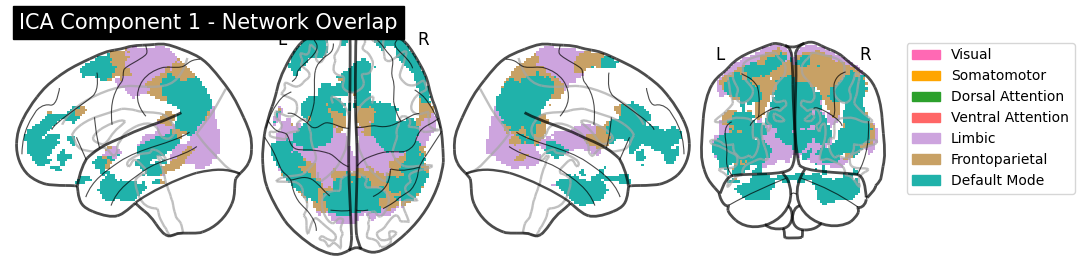

Saved: ./separate_ica_figures_Advanced_L1/ICA_Component_1_colored.png


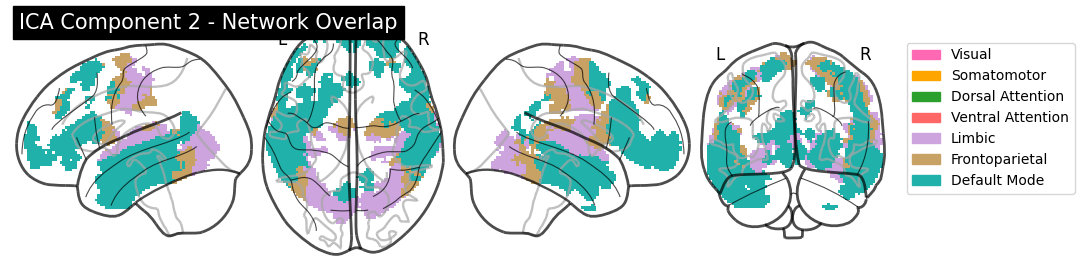

Saved: ./separate_ica_figures_Advanced_L1/ICA_Component_2_colored.png


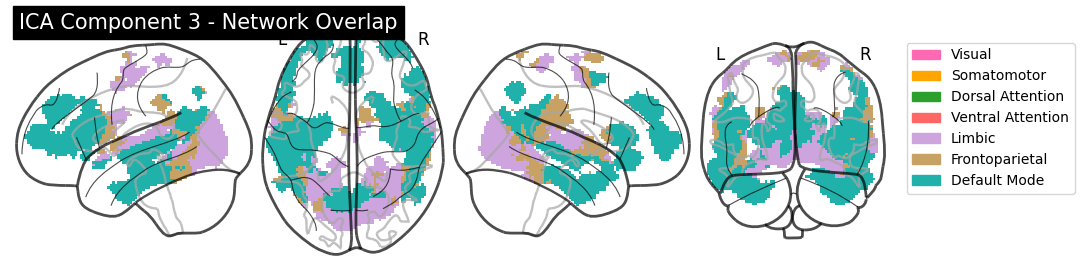

Saved: ./separate_ica_figures_Advanced_L1/ICA_Component_3_colored.png


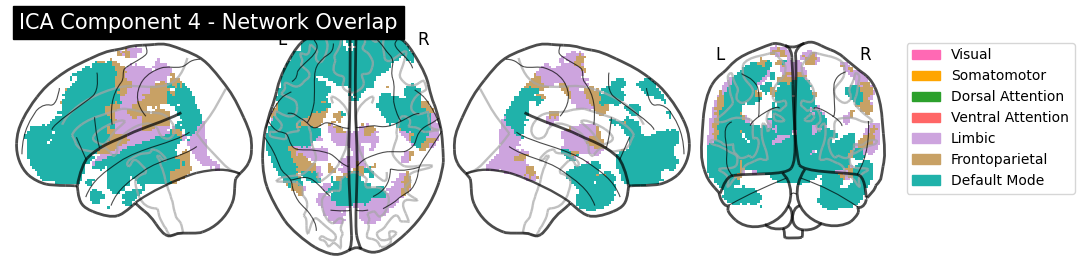

Saved: ./separate_ica_figures_Advanced_L1/ICA_Component_4_colored.png


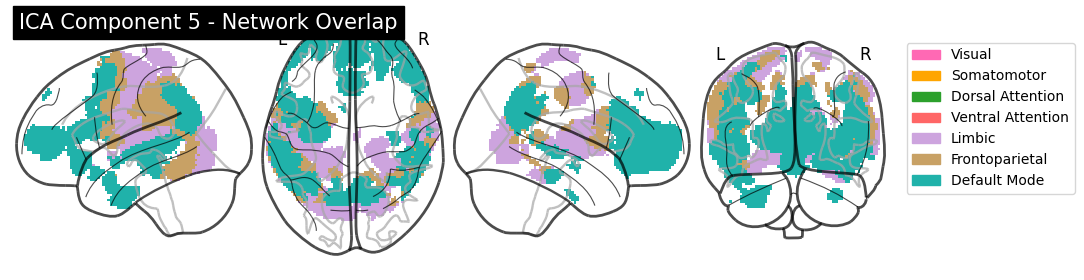

Saved: ./separate_ica_figures_Advanced_L1/ICA_Component_5_colored.png


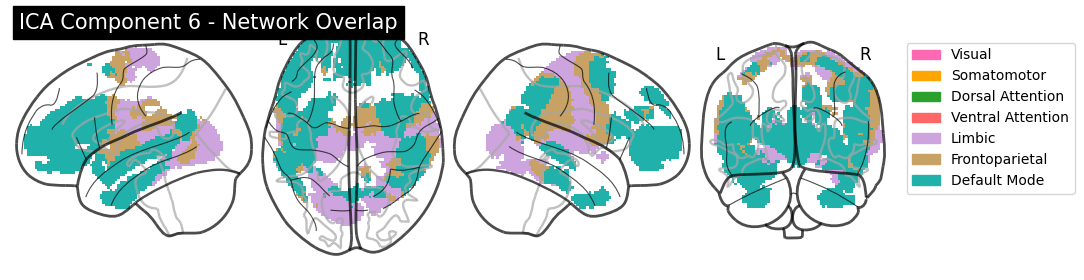

Saved: ./separate_ica_figures_Advanced_L1/ICA_Component_6_colored.png


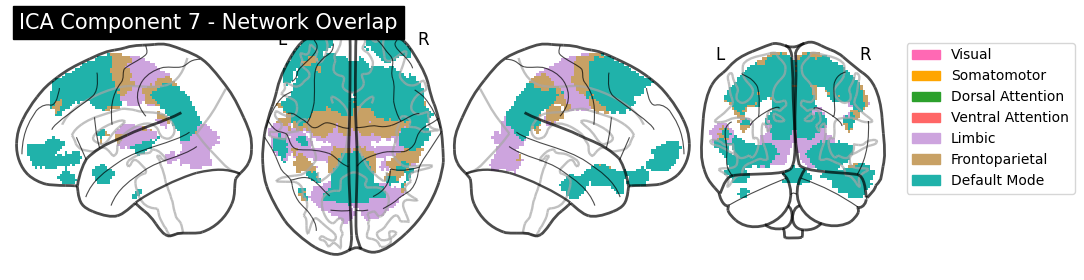

Saved: ./separate_ica_figures_Advanced_L1/ICA_Component_7_colored.png


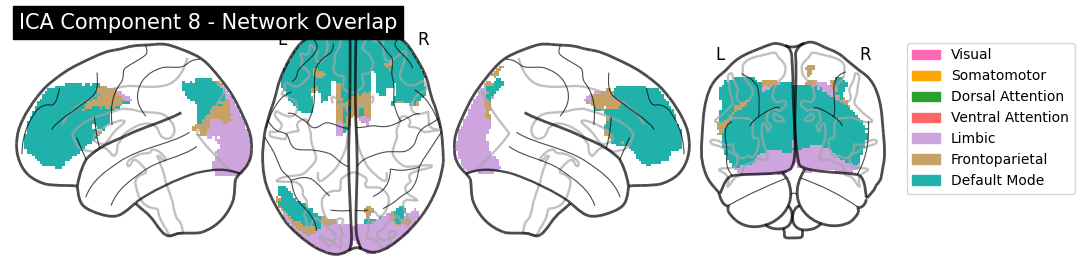

Saved: ./separate_ica_figures_Advanced_L1/ICA_Component_8_colored.png


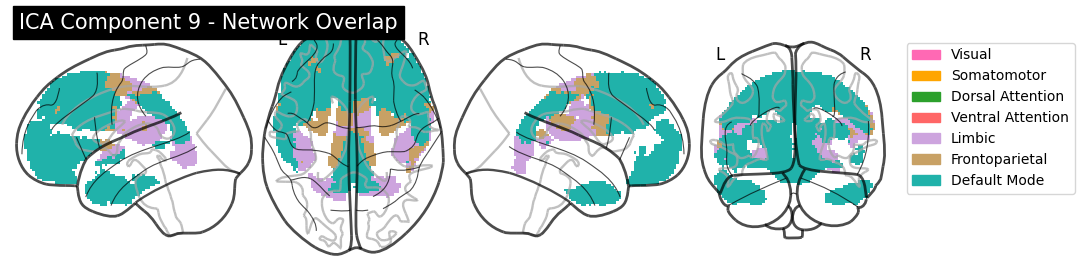

Saved: ./separate_ica_figures_Advanced_L1/ICA_Component_9_colored.png


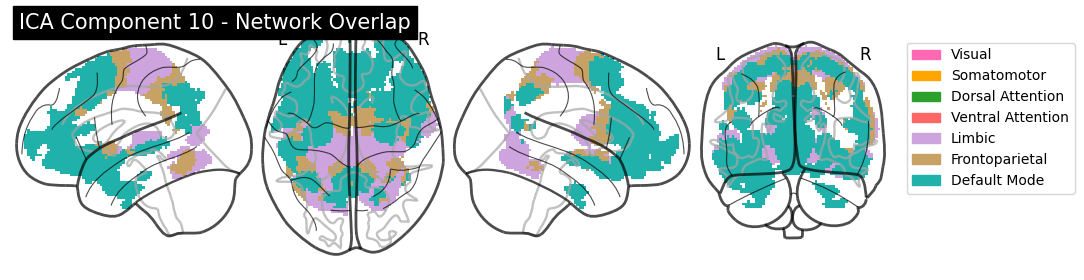

Saved: ./separate_ica_figures_Advanced_L1/ICA_Component_10_colored.png


In [26]:
import os
import glob
import numpy as np
import nibabel as nib
import pandas as pd
import matplotlib.pyplot as plt
from nilearn import image, plotting
from nilearn.image import resample_to_img
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# Paths
ica_dir = "/Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Advanced_L1"
atlas_path = "/Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/networks/Schaefer2018_1000Parcels_7Networks_order_FSLMNI152_2mm.nii.gz"
labels_path = "/Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/networks/Schaefer2018_1000Parcels_7Networks_order.txt"

# Output directory for individual ICA figures
figdir = "./separate_ica_figures_Advanced_L1"
os.makedirs(figdir, exist_ok=True)

# Load ICA components
ica_files = sorted(glob.glob(os.path.join(ica_dir, "ICA_*.nii.gz")))
ica_imgs = [nib.load(f) for f in ica_files]

# Load atlas and labels
atlas_img = nib.load(atlas_path)
atlas_data = atlas_img.get_fdata()

# Load and parse network labels
with open(labels_path, 'r') as f:
    labels = f.read().splitlines()

network_names_all = [label.split('_')[2] for label in labels]
unique_networks = sorted(set(network_names_all), key=network_names_all.index)
network_id_map = {name: idx + 1 for idx, name in enumerate(unique_networks)}
parcel_network_ids = np.array([network_id_map[n] for n in network_names_all])

# Build atlas map where each voxel is labeled with its network ID
atlas_network_map = np.zeros_like(atlas_data)
for parcel_idx in range(1, 1001):
    atlas_network_map[atlas_data == parcel_idx] = parcel_network_ids[parcel_idx - 1]

# Precompute voxel count per network
network_voxel_counts = {}
for net_id in range(1, 8):
    network_voxel_counts[net_id] = np.sum(atlas_network_map == net_id)

# Results list
results = []

# Analyze each ICA component
for comp_idx, comp_img in enumerate(ica_imgs):
    resampled_img = resample_to_img(comp_img, atlas_img, interpolation='continuous')
    comp_data = resampled_img.get_fdata()
    threshold = np.percentile(np.abs(comp_data), 95)
    active_voxels = np.abs(comp_data) >= threshold

    for net_id in range(1, 8):
        network_voxels = atlas_network_map == net_id
        shared_voxels = np.sum(active_voxels & network_voxels)
        percent_overlap = (shared_voxels / network_voxel_counts[net_id]) * 100 if network_voxel_counts[net_id] > 0 else 0

        results.append({
            "Component": f"ICA_{comp_idx + 1}",
            "Network_ID": net_id,
            "Network_Name": [k for k, v in network_id_map.items() if v == net_id][0],
            "Overlap_Voxels": shared_voxels,
            "Percent_Overlap": percent_overlap
        })

# Save CSVs
df = pd.DataFrame(results)

# Save voxel counts
df_voxels = df.pivot(index="Component", columns="Network_Name", values="Overlap_Voxels").fillna(0)
df_voxels.to_csv("ica_network_overlap_Advanced_L1_voxels.csv")

# Save percent overlaps
df_percent = df.pivot(index="Component", columns="Network_Name", values="Percent_Overlap").fillna(0)
df_percent.to_csv("ica_network_overlap_Advanced_L1_percentage.csv")

# Define color map and labels
network_ids = [1, 2, 3, 4, 5, 6, 7]
network_names = ["Visual", "Somatomotor", "Dorsal Attention", "Ventral Attention",
                 "Limbic", "Frontoparietal", "Default Mode"]
network_colors = [
    "#ff69b4",  # hot pink
    "#ffa500",  # vibrant orange
    "#2ca02c",  # bright light green
    "#ff6666",  # brighter light red
    "#cda4de",  # pastel purple with more color
    "#c8a165",  # warm light brown / caramel
    "#20b2aa"  # deep sky blue
]
custom_cmap = ListedColormap(network_colors)

# Plotting each ICA component's overlap
for comp_idx, comp_img in enumerate(ica_imgs):
    resampled_img = resample_to_img(comp_img, atlas_img, interpolation='continuous')
    comp_data = resampled_img.get_fdata()
    threshold = np.percentile(np.abs(comp_data), 95)
    active_voxels = np.abs(comp_data) >= threshold

    # Labeled map: 0 = background, others = network ID
    labeled_map = np.zeros_like(comp_data)
    for net_id in network_ids:
        net_mask = (atlas_network_map == net_id)
        labeled_map[active_voxels & net_mask] = net_id

    labeled_img = nib.Nifti1Image(labeled_map, affine=atlas_img.affine)

    # Display & Save
    display = plotting.plot_glass_brain(
        labeled_img, cmap=custom_cmap, display_mode='lzry', colorbar=False,
        title=f"ICA Component {comp_idx + 1} - Network Overlap"
    )

    legend_patches = [mpatches.Patch(color=network_colors[i], label=network_names[i]) for i in range(len(network_ids))]
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    output_path = os.path.join(figdir, f"ICA_Component_{comp_idx + 1}_colored.png")
    plt.savefig(output_path, bbox_inches='tight', dpi=150)
    plt.show()
    print(f"Saved: {output_path}")

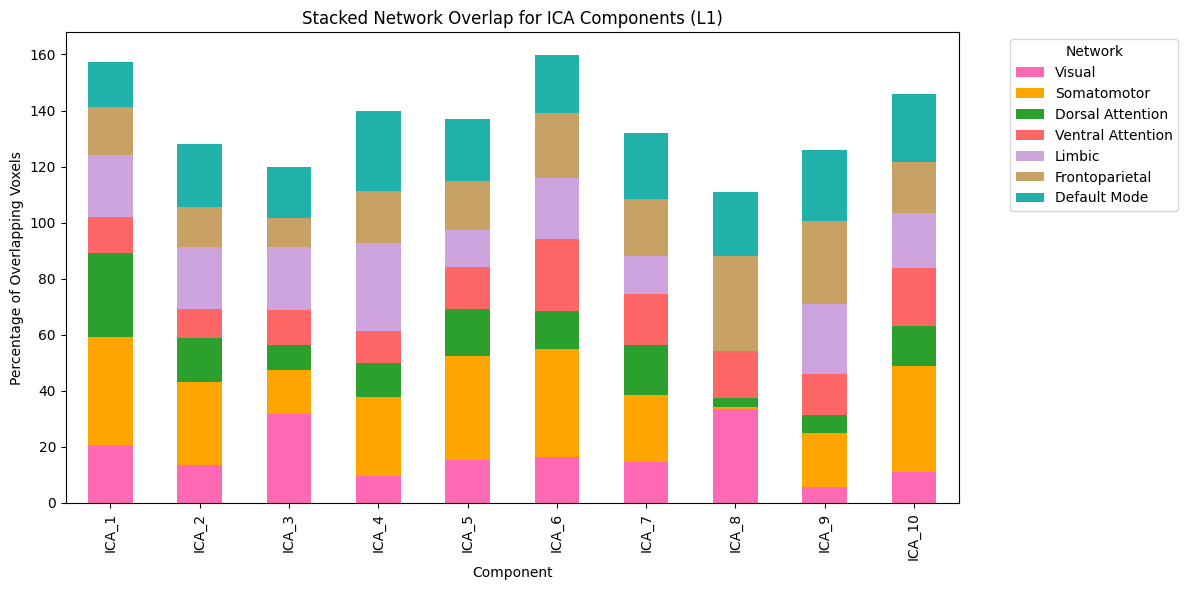

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Load your data
csv_path = "/Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ica_network_overlap_Advanced_L1_percentage.csv"
df = pd.read_csv(csv_path)

# Set desired order for ICA components (ICA_1 to ICA_10)
df['Component'] = pd.Categorical(df['Component'],
    categories=sorted(df['Component'], key=lambda x: int(x.split('_')[1])),
    ordered=True)

# Define network order and labels
network_order_short = ['Vis', 'SomMot', 'DorsAttn', 'SalVentAttn', 'Limbic', 'Cont', 'Default']
network_order_full = ["Visual", "Somatomotor", "Dorsal Attention", "Ventral Attention",
                      "Limbic", "Frontoparietal", "Default Mode"]

# Define color map
network_colors = [
    "#ff69b4",  # Visual - hot pink
    "#ffa500",  # Somatomotor - orange
    "#2ca02c",  # Dorsal Attention - green
    "#ff6666",  # Ventral Attention - light red
    "#cda4de",  # Limbic - pastel purple
    "#c8a165",  # Frontoparietal - caramel
    "#20b2aa"   # Default Mode - deep sky blue
]
custom_cmap = ListedColormap(network_colors)

# Network label mapping
network_name_map = {
    'Vis': 'Visual',
    'SomMot': 'Somatomotor',
    'DorsAttn': 'Dorsal Attention',
    'SalVentAttn': 'Ventral Attention',
    'Limbic': 'Limbic',
    'Cont': 'Frontoparietal',
    'Default': 'Default Mode'
}

# --- Stacked Bar Plot ---
df_sorted = df.sort_values('Component')
df_plot = df_sorted.set_index('Component')[network_order_short]
df_plot.columns = [network_name_map[col] for col in df_plot.columns]

df_plot.plot(kind='bar', stacked=True, figsize=(12, 6), color=network_colors)
plt.ylabel("Percentage of Overlapping Voxels")
plt.title("Stacked Network Overlap for ICA Components (L1)")
plt.legend(title='Network', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

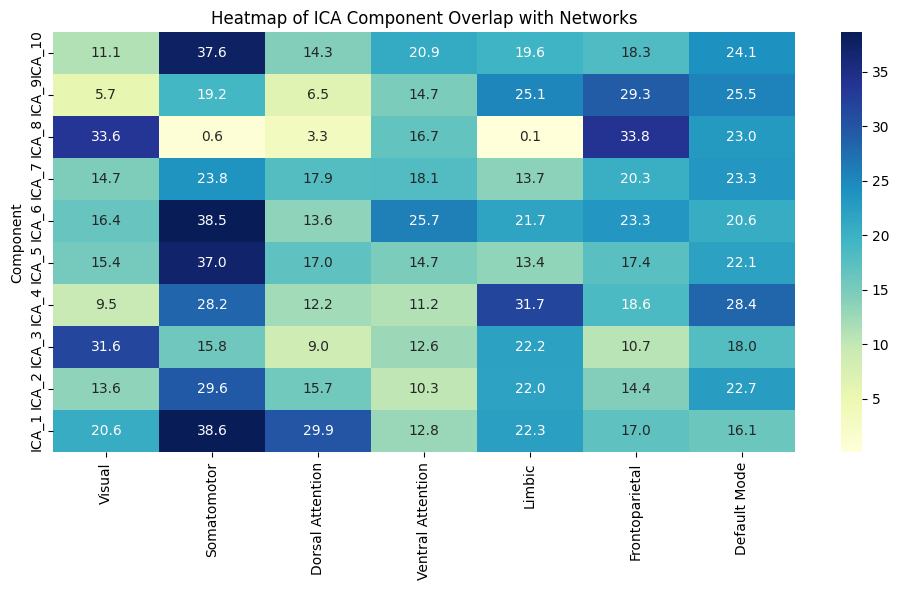

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
csv_path = "/Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ica_network_overlap_Advanced_L1_percentage.csv"
df = pd.read_csv(csv_path)

# Set desired order for components (ICA_1 to ICA_10)
df['Component'] = pd.Categorical(df['Component'],
    categories=sorted(df['Component'], key=lambda x: int(x.split('_')[1])),
    ordered=True)

# Set the desired network order
network_order_short = ['Vis', 'SomMot', 'DorsAttn', 'SalVentAttn', 'Limbic', 'Cont', 'Default']
network_order_full = ['Visual', 'Somatomotor', 'Dorsal Attention', 'Ventral Attention', 'Limbic', 'Frontoparietal', 'Default Mode']

# Mapping short to full network names
network_name_map = {
    'Vis': 'Visual',
    'SomMot': 'Somatomotor',
    'DorsAttn': 'Dorsal Attention',
    'SalVentAttn': 'Ventral Attention',
    'Limbic': 'Limbic',
    'Cont': 'Frontoparietal',
    'Default': 'Default Mode'
}
# --- Heatmap ---
plt.figure(figsize=(10, 6))
heatmap_data = df.set_index('Component').loc[:, network_order_short]
heatmap_data.columns = [network_name_map[col] for col in heatmap_data.columns]

# Ensure correct order ICA_1 to ICA_10 top to bottom
heatmap_data = heatmap_data.loc[sorted(heatmap_data.index, key=lambda x: int(x.split('_')[1]))]
heatmap_data = heatmap_data.iloc[::-1]  # Flip vertically to put ICA_1 at top

sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title("Heatmap of ICA Component Overlap with Networks")
plt.tight_layout()
plt.show()

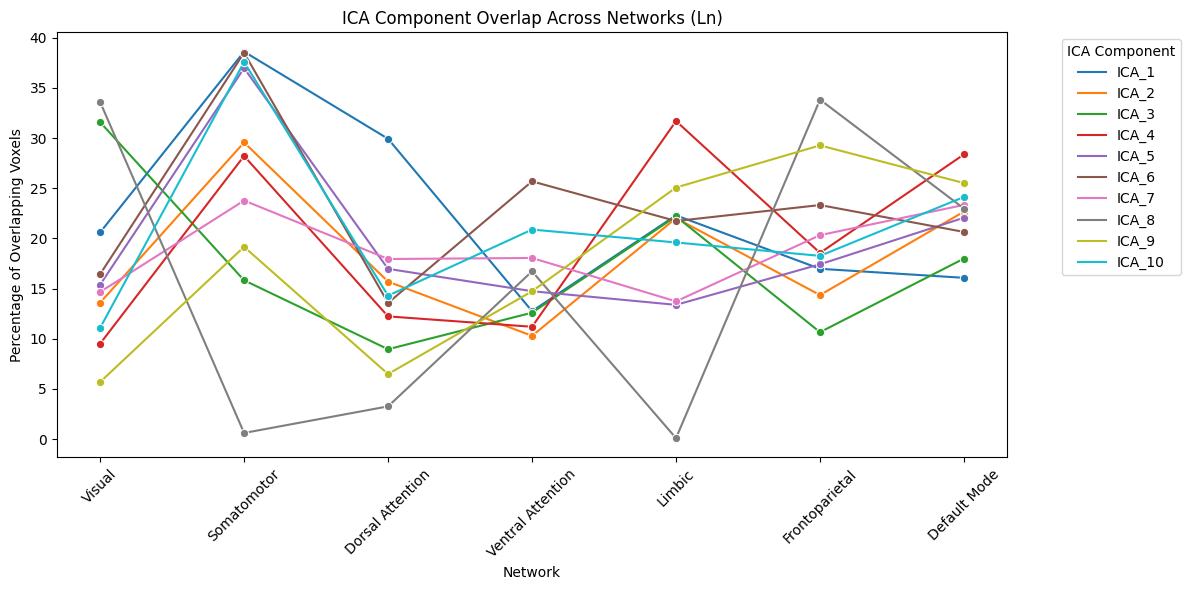

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
csv_path = "/Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ica_network_overlap_Advanced_L1_percentage.csv"
df = pd.read_csv(csv_path)

# Set the desired network orders
network_order_short = ['Vis', 'SomMot', 'DorsAttn', 'SalVentAttn', 'Limbic', 'Cont', 'Default']
network_order_full = ['Visual', 'Somatomotor', 'Dorsal Attention', 'Ventral Attention', 'Limbic', 'Frontoparietal', 'Default Mode']

# Create mapping for full names
network_name_map = {
    'Vis': 'Visual',
    'SomMot': 'Somatomotor',
    'DorsAttn': 'Dorsal Attention',
    'SalVentAttn': 'Ventral Attention',
    'Limbic': 'Limbic',
    'Cont': 'Frontoparietal',
    'Default': 'Default Mode'
}

# Ensure ICA components are ordered (ICA_1 to ICA_10)
df['Component'] = pd.Categorical(df['Component'],
    categories=sorted(df['Component'], key=lambda x: int(x.split('_')[1])),
    ordered=True)

# Melt the dataframe into long format for seaborn
df_long = pd.melt(df, id_vars='Component', value_vars=network_order_short,
                  var_name='Network', value_name='Overlap')

# Map network short names to full names
df_long['Network'] = df_long['Network'].map(network_name_map)

# Set categorical order for networks
df_long['Network'] = pd.Categorical(df_long['Network'], categories=network_order_full, ordered=True)

# --- Line Plot ---
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long, x='Network', y='Overlap', hue='Component', marker='o')
plt.title("ICA Component Overlap Across Networks (Ln)")
plt.ylabel("Percentage of Overlapping Voxels")
plt.xticks(rotation=45)
plt.legend(title='ICA Component', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

Ln

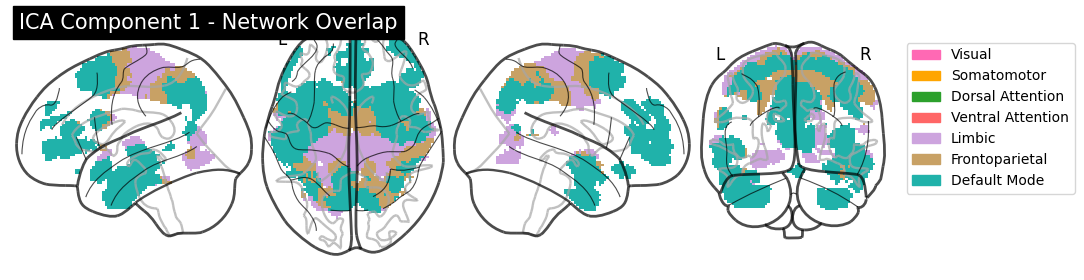

Saved: ./separate_ica_figures_Advanced_L1/ICA_Component_1_colored.png


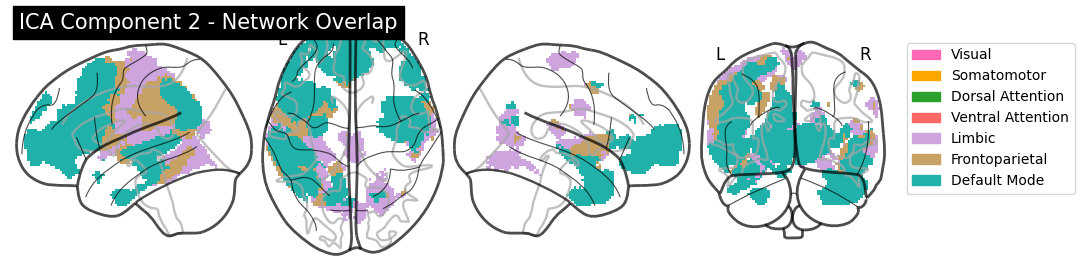

Saved: ./separate_ica_figures_Advanced_L1/ICA_Component_2_colored.png


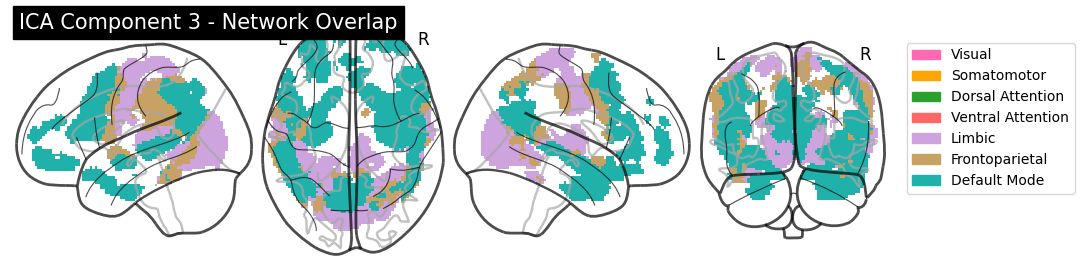

Saved: ./separate_ica_figures_Advanced_L1/ICA_Component_3_colored.png


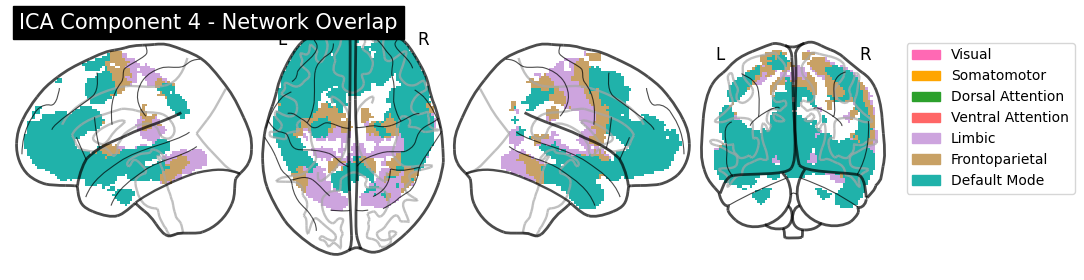

Saved: ./separate_ica_figures_Advanced_L1/ICA_Component_4_colored.png


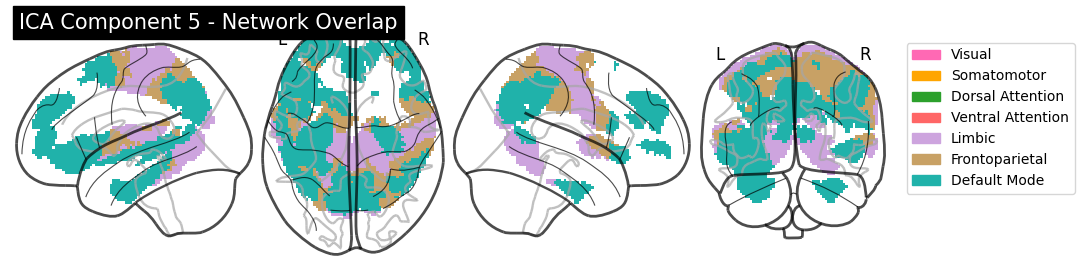

Saved: ./separate_ica_figures_Advanced_L1/ICA_Component_5_colored.png


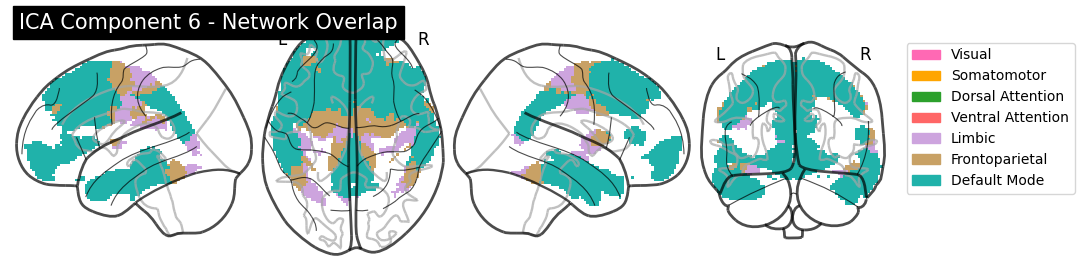

Saved: ./separate_ica_figures_Advanced_L1/ICA_Component_6_colored.png


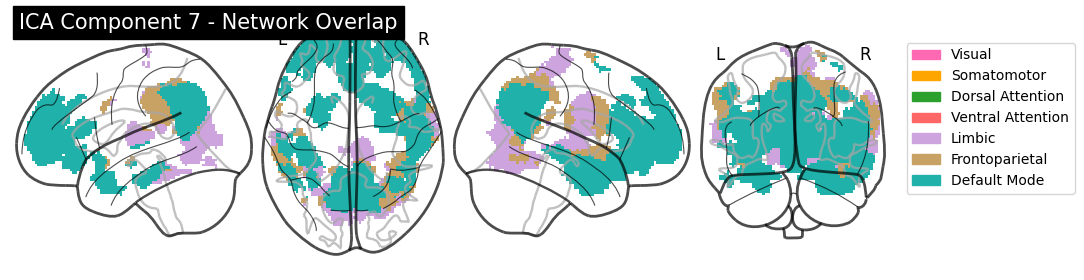

Saved: ./separate_ica_figures_Advanced_L1/ICA_Component_7_colored.png


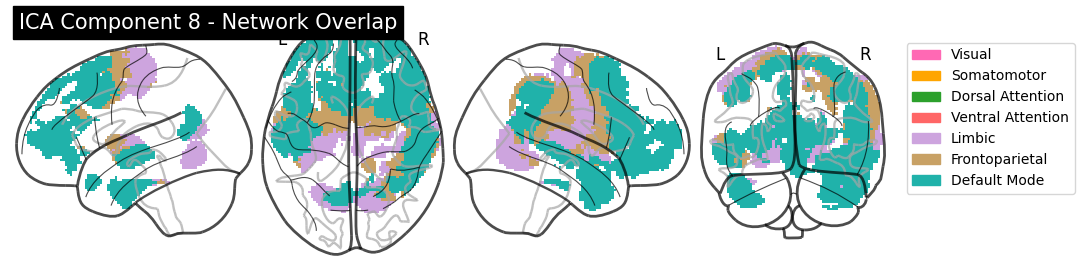

Saved: ./separate_ica_figures_Advanced_L1/ICA_Component_8_colored.png


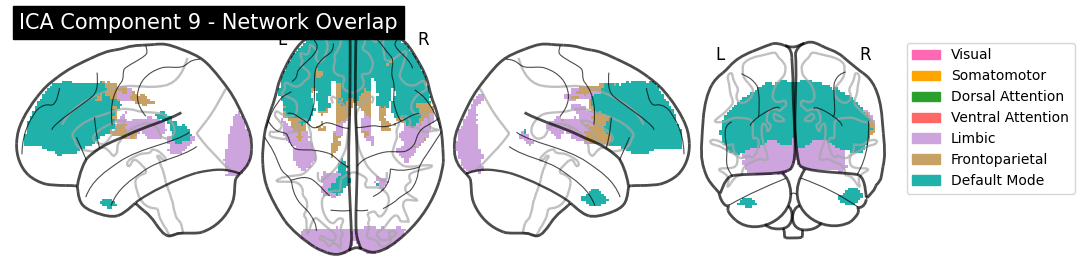

Saved: ./separate_ica_figures_Advanced_L1/ICA_Component_9_colored.png


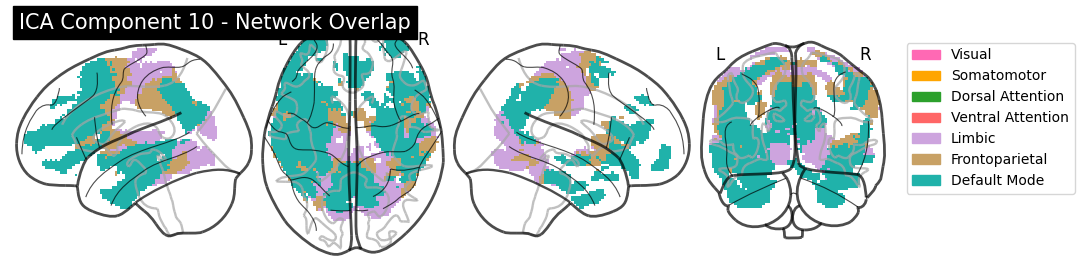

Saved: ./separate_ica_figures_Advanced_L1/ICA_Component_10_colored.png


In [31]:
import os
import glob
import numpy as np
import nibabel as nib
import pandas as pd
import matplotlib.pyplot as plt
from nilearn import image, plotting
from nilearn.image import resample_to_img
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# Paths
ica_dir = "/Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Advanced_Ln"
atlas_path = "/Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/networks/Schaefer2018_1000Parcels_7Networks_order_FSLMNI152_2mm.nii.gz"
labels_path = "/Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/networks/Schaefer2018_1000Parcels_7Networks_order.txt"

# Output directory for individual ICA figures
figdir = "./separate_ica_figures_Advanced_L1"
os.makedirs(figdir, exist_ok=True)

# Load ICA components
ica_files = sorted(glob.glob(os.path.join(ica_dir, "ICA_*.nii.gz")))
ica_imgs = [nib.load(f) for f in ica_files]

# Load atlas and labels
atlas_img = nib.load(atlas_path)
atlas_data = atlas_img.get_fdata()

# Load and parse network labels
with open(labels_path, 'r') as f:
    labels = f.read().splitlines()

network_names_all = [label.split('_')[2] for label in labels]
unique_networks = sorted(set(network_names_all), key=network_names_all.index)
network_id_map = {name: idx + 1 for idx, name in enumerate(unique_networks)}
parcel_network_ids = np.array([network_id_map[n] for n in network_names_all])

# Build atlas map where each voxel is labeled with its network ID
atlas_network_map = np.zeros_like(atlas_data)
for parcel_idx in range(1, 1001):
    atlas_network_map[atlas_data == parcel_idx] = parcel_network_ids[parcel_idx - 1]

# Precompute voxel count per network
network_voxel_counts = {}
for net_id in range(1, 8):
    network_voxel_counts[net_id] = np.sum(atlas_network_map == net_id)

# Results list
results = []

# Analyze each ICA component
for comp_idx, comp_img in enumerate(ica_imgs):
    resampled_img = resample_to_img(comp_img, atlas_img, interpolation='continuous')
    comp_data = resampled_img.get_fdata()
    threshold = np.percentile(np.abs(comp_data), 95)
    active_voxels = np.abs(comp_data) >= threshold

    for net_id in range(1, 8):
        network_voxels = atlas_network_map == net_id
        shared_voxels = np.sum(active_voxels & network_voxels)
        percent_overlap = (shared_voxels / network_voxel_counts[net_id]) * 100 if network_voxel_counts[net_id] > 0 else 0

        results.append({
            "Component": f"ICA_{comp_idx + 1}",
            "Network_ID": net_id,
            "Network_Name": [k for k, v in network_id_map.items() if v == net_id][0],
            "Overlap_Voxels": shared_voxels,
            "Percent_Overlap": percent_overlap
        })

# Save CSVs
df = pd.DataFrame(results)

# Save voxel counts
df_voxels = df.pivot(index="Component", columns="Network_Name", values="Overlap_Voxels").fillna(0)
df_voxels.to_csv("ica_network_overlap_Advanced_Ln_voxels.csv")

# Save percent overlaps
df_percent = df.pivot(index="Component", columns="Network_Name", values="Percent_Overlap").fillna(0)
df_percent.to_csv("ica_network_overlap_Advanced_Ln_percentage.csv")

# Define color map and labels
network_ids = [1, 2, 3, 4, 5, 6, 7]
network_names = ["Visual", "Somatomotor", "Dorsal Attention", "Ventral Attention",
                 "Limbic", "Frontoparietal", "Default Mode"]
network_colors = [
    "#ff69b4",  # hot pink
    "#ffa500",  # vibrant orange
    "#2ca02c",  # bright light green
    "#ff6666",  # brighter light red
    "#cda4de",  # pastel purple with more color
    "#c8a165",  # warm light brown / caramel
    "#20b2aa"  # deep sky blue
]
custom_cmap = ListedColormap(network_colors)

# Plotting each ICA component's overlap
for comp_idx, comp_img in enumerate(ica_imgs):
    resampled_img = resample_to_img(comp_img, atlas_img, interpolation='continuous')
    comp_data = resampled_img.get_fdata()
    threshold = np.percentile(np.abs(comp_data), 95)
    active_voxels = np.abs(comp_data) >= threshold

    # Labeled map: 0 = background, others = network ID
    labeled_map = np.zeros_like(comp_data)
    for net_id in network_ids:
        net_mask = (atlas_network_map == net_id)
        labeled_map[active_voxels & net_mask] = net_id

    labeled_img = nib.Nifti1Image(labeled_map, affine=atlas_img.affine)

    # Display & Save
    display = plotting.plot_glass_brain(
        labeled_img, cmap=custom_cmap, display_mode='lzry', colorbar=False,
        title=f"ICA Component {comp_idx + 1} - Network Overlap"
    )

    legend_patches = [mpatches.Patch(color=network_colors[i], label=network_names[i]) for i in range(len(network_ids))]
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    output_path = os.path.join(figdir, f"ICA_Component_{comp_idx + 1}_colored.png")
    plt.savefig(output_path, bbox_inches='tight', dpi=150)
    plt.show()
    print(f"Saved: {output_path}")

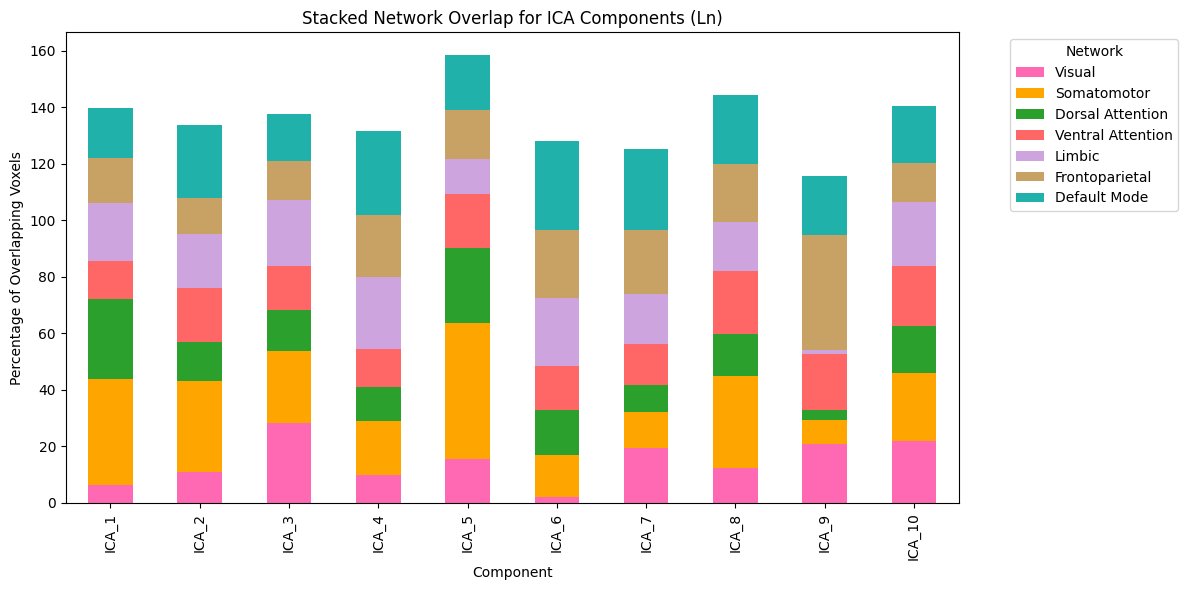

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Load your data
csv_path = "/Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ica_network_overlap_Advanced_Ln_percentage.csv"
df = pd.read_csv(csv_path)

# Set desired order for ICA components (ICA_1 to ICA_10)
df['Component'] = pd.Categorical(df['Component'],
    categories=sorted(df['Component'], key=lambda x: int(x.split('_')[1])),
    ordered=True)

# Define network order and labels
network_order_short = ['Vis', 'SomMot', 'DorsAttn', 'SalVentAttn', 'Limbic', 'Cont', 'Default']
network_order_full = ["Visual", "Somatomotor", "Dorsal Attention", "Ventral Attention",
                      "Limbic", "Frontoparietal", "Default Mode"]

# Define color map
network_colors = [
    "#ff69b4",  # Visual - hot pink
    "#ffa500",  # Somatomotor - orange
    "#2ca02c",  # Dorsal Attention - green
    "#ff6666",  # Ventral Attention - light red
    "#cda4de",  # Limbic - pastel purple
    "#c8a165",  # Frontoparietal - caramel
    "#20b2aa"   # Default Mode - deep sky blue
]
custom_cmap = ListedColormap(network_colors)

# Network label mapping
network_name_map = {
    'Vis': 'Visual',
    'SomMot': 'Somatomotor',
    'DorsAttn': 'Dorsal Attention',
    'SalVentAttn': 'Ventral Attention',
    'Limbic': 'Limbic',
    'Cont': 'Frontoparietal',
    'Default': 'Default Mode'
}

# --- Stacked Bar Plot ---
df_sorted = df.sort_values('Component')
df_plot = df_sorted.set_index('Component')[network_order_short]
df_plot.columns = [network_name_map[col] for col in df_plot.columns]

df_plot.plot(kind='bar', stacked=True, figsize=(12, 6), color=network_colors)
plt.ylabel("Percentage of Overlapping Voxels")
plt.title("Stacked Network Overlap for ICA Components (Ln)")
plt.legend(title='Network', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

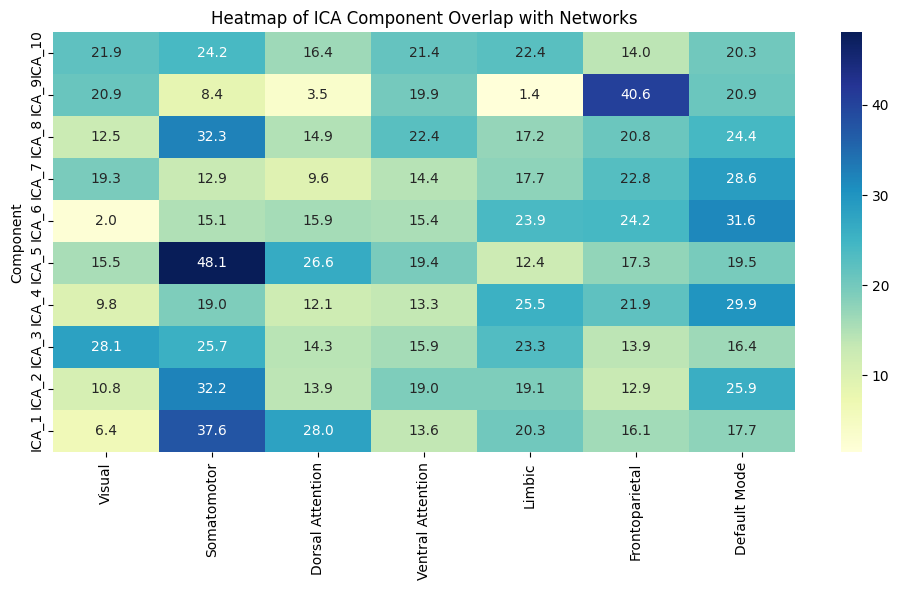

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
csv_path = "/Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ica_network_overlap_Advanced_Ln_percentage.csv"
df = pd.read_csv(csv_path)

# Set desired order for components (ICA_1 to ICA_10)
df['Component'] = pd.Categorical(df['Component'],
    categories=sorted(df['Component'], key=lambda x: int(x.split('_')[1])),
    ordered=True)

# Set the desired network order
network_order_short = ['Vis', 'SomMot', 'DorsAttn', 'SalVentAttn', 'Limbic', 'Cont', 'Default']
network_order_full = ['Visual', 'Somatomotor', 'Dorsal Attention', 'Ventral Attention', 'Limbic', 'Frontoparietal', 'Default Mode']

# Mapping short to full network names
network_name_map = {
    'Vis': 'Visual',
    'SomMot': 'Somatomotor',
    'DorsAttn': 'Dorsal Attention',
    'SalVentAttn': 'Ventral Attention',
    'Limbic': 'Limbic',
    'Cont': 'Frontoparietal',
    'Default': 'Default Mode'
}
# --- Heatmap ---
plt.figure(figsize=(10, 6))
heatmap_data = df.set_index('Component').loc[:, network_order_short]
heatmap_data.columns = [network_name_map[col] for col in heatmap_data.columns]

# Ensure correct order ICA_1 to ICA_10 top to bottom
heatmap_data = heatmap_data.loc[sorted(heatmap_data.index, key=lambda x: int(x.split('_')[1]))]
heatmap_data = heatmap_data.iloc[::-1]  # Flip vertically to put ICA_1 at top

sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title("Heatmap of ICA Component Overlap with Networks")
plt.tight_layout()
plt.show()

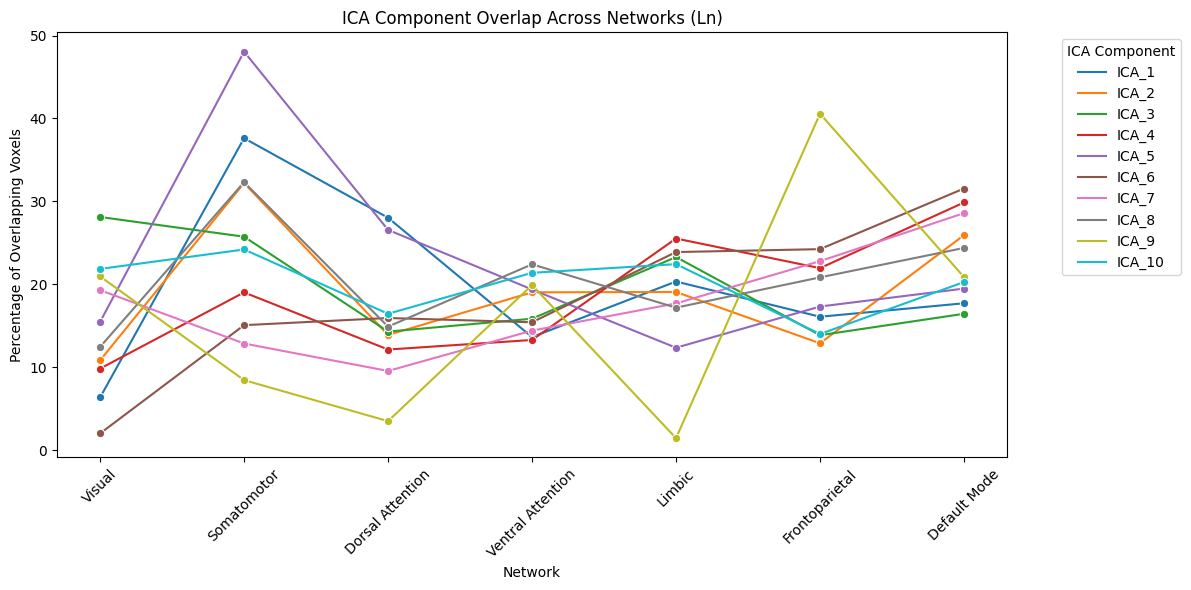

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
csv_path = "/Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ica_network_overlap_Advanced_Ln_percentage.csv"
df = pd.read_csv(csv_path)

# Set the desired network orders
network_order_short = ['Vis', 'SomMot', 'DorsAttn', 'SalVentAttn', 'Limbic', 'Cont', 'Default']
network_order_full = ['Visual', 'Somatomotor', 'Dorsal Attention', 'Ventral Attention', 'Limbic', 'Frontoparietal', 'Default Mode']

# Create mapping for full names
network_name_map = {
    'Vis': 'Visual',
    'SomMot': 'Somatomotor',
    'DorsAttn': 'Dorsal Attention',
    'SalVentAttn': 'Ventral Attention',
    'Limbic': 'Limbic',
    'Cont': 'Frontoparietal',
    'Default': 'Default Mode'
}

# Ensure ICA components are ordered (ICA_1 to ICA_10)
df['Component'] = pd.Categorical(df['Component'],
    categories=sorted(df['Component'], key=lambda x: int(x.split('_')[1])),
    ordered=True)

# Melt the dataframe into long format for seaborn
df_long = pd.melt(df, id_vars='Component', value_vars=network_order_short,
                  var_name='Network', value_name='Overlap')

# Map network short names to full names
df_long['Network'] = df_long['Network'].map(network_name_map)

# Set categorical order for networks
df_long['Network'] = pd.Categorical(df_long['Network'], categories=network_order_full, ordered=True)

# --- Line Plot ---
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long, x='Network', y='Overlap', hue='Component', marker='o')
plt.title("ICA Component Overlap Across Networks (Ln)")
plt.ylabel("Percentage of Overlapping Voxels")
plt.xticks(rotation=45)
plt.legend(title='ICA Component', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

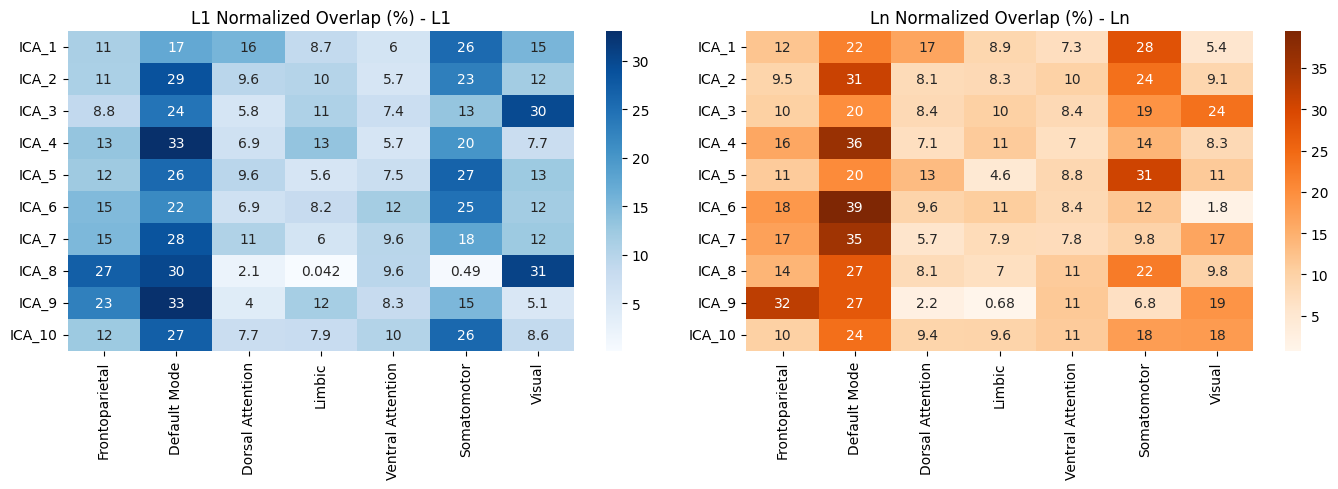

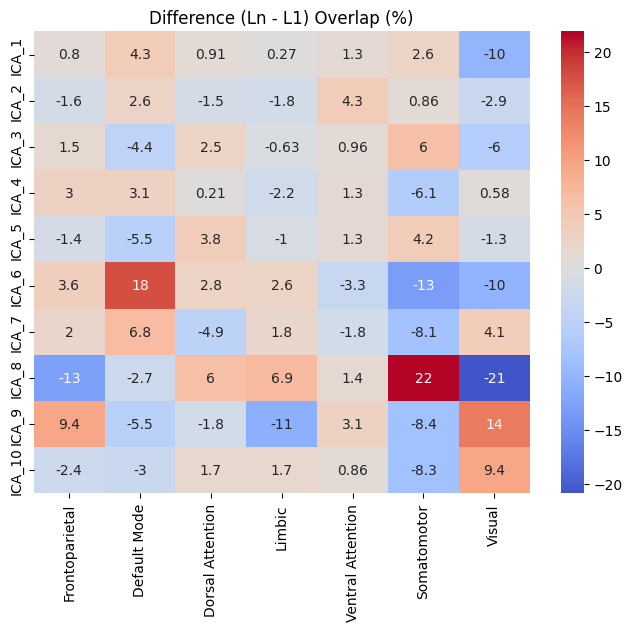


Paired t-test results (Ln vs L1) per network:
Frontoparietal: t = 0.12, p = 0.9034
Default Mode: t = 0.59, p = 0.5720
Dorsal Attention: t = 0.98, p = 0.3522
Limbic: t = -0.22, p = 0.8281
Ventral Attention: t = 1.37, p = 0.2053
Somatomotor: t = -0.26, p = 0.8023
Visual: t = -0.72, p = 0.4896


In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

# Load the data
l1_df = pd.read_csv("ica_network_overlap_Advanced_L1_voxels.csv", index_col=0)
ln_df = pd.read_csv("ica_network_overlap_Advanced_Ln_voxels.csv", index_col=0)

# Rename columns to full network names
rename_map = {
    'Vis': 'Visual',
    'SomMot': 'Somatomotor',
    'DorsAttn': 'Dorsal Attention',
    'SalVentAttn': 'Ventral Attention',
    'Limbic': 'Limbic',
    'Cont': 'Frontoparietal',
    'Default': 'Default Mode'
}
l1_df = l1_df.rename(columns=rename_map)
ln_df = ln_df.rename(columns=rename_map)

# Reorder rows by ICA component number (ICA_1, ICA_2, ...)
def sort_ica_rows(df):
    df.index = df.index.str.extract(r'ICA_(\d+)', expand=False).astype(int)
    df = df.sort_index()
    df.index = [f"ICA_{i}" for i in df.index]
    return df

l1_df = sort_ica_rows(l1_df)
ln_df = sort_ica_rows(ln_df)

# Normalize to percentage per component
l1_norm = l1_df.div(l1_df.sum(axis=1), axis=0) * 100
ln_norm = ln_df.div(ln_df.sum(axis=1), axis=0) * 100

# Heatmaps
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.heatmap(l1_norm, annot=True, cmap='Blues')
plt.title('L1 Normalized Overlap (%) - L1')

plt.subplot(1, 2, 2)
sns.heatmap(ln_norm, annot=True, cmap='Oranges')
plt.title('Ln Normalized Overlap (%) - Ln')
plt.tight_layout()
plt.show()

# Difference heatmap
diff = ln_norm - l1_norm
plt.figure(figsize=(8, 6))
sns.heatmap(diff, annot=True, center=0, cmap='coolwarm')
plt.title('Difference (Ln - L1) Overlap (%)')
plt.show()

# Paired t-tests per network
print("\nPaired t-test results (Ln vs L1) per network:")
for network in l1_norm.columns:
    t_stat, p_val = ttest_rel(ln_norm[network], l1_norm[network])
    print(f"{network}: t = {t_stat:.2f}, p = {p_val:.4f}")

Basic

L1

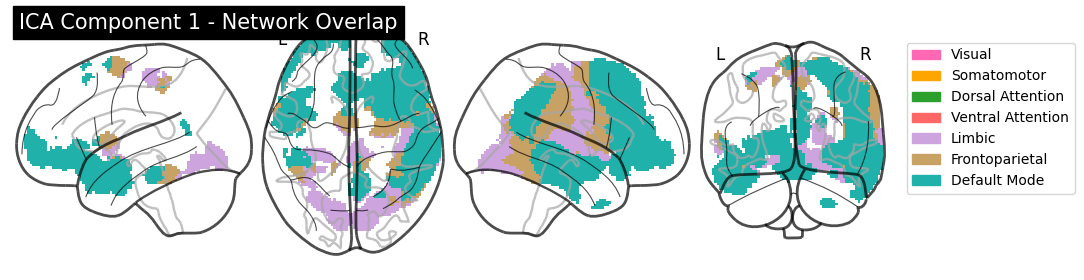

Saved: ./separate_ica_figures_Advanced_L1/ICA_Component_1_colored.png


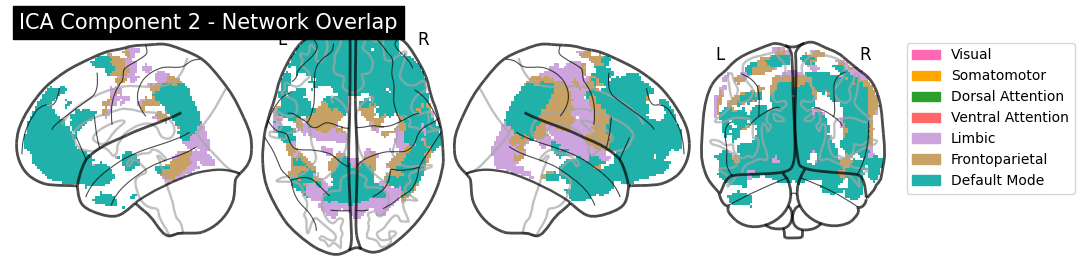

Saved: ./separate_ica_figures_Advanced_L1/ICA_Component_2_colored.png


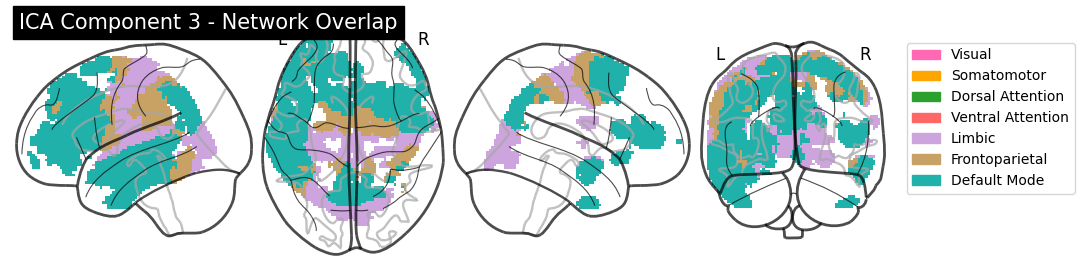

Saved: ./separate_ica_figures_Advanced_L1/ICA_Component_3_colored.png


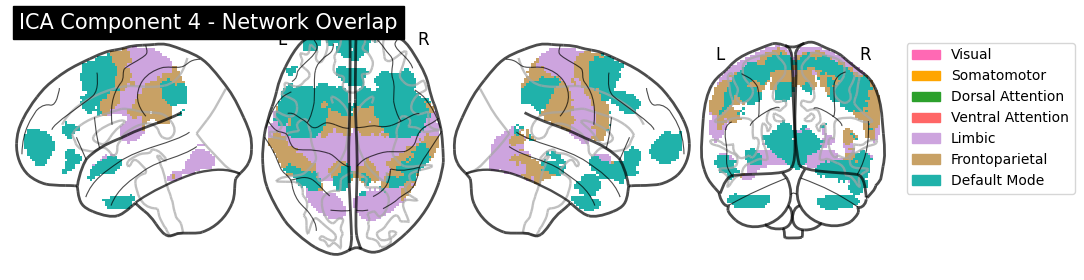

Saved: ./separate_ica_figures_Advanced_L1/ICA_Component_4_colored.png


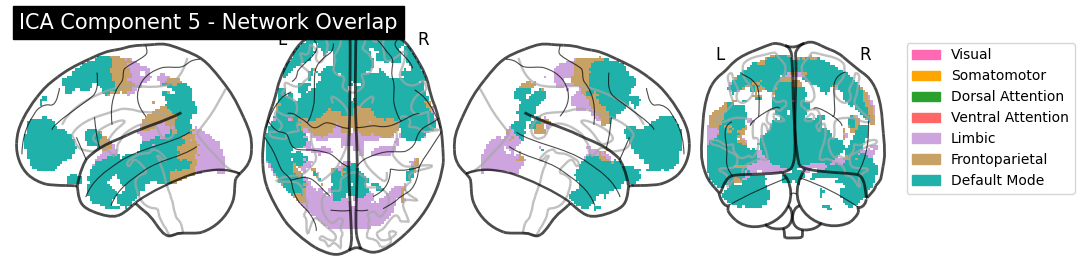

Saved: ./separate_ica_figures_Advanced_L1/ICA_Component_5_colored.png


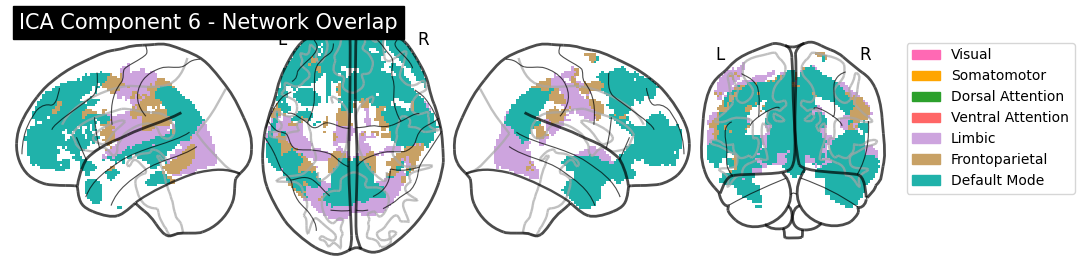

Saved: ./separate_ica_figures_Advanced_L1/ICA_Component_6_colored.png


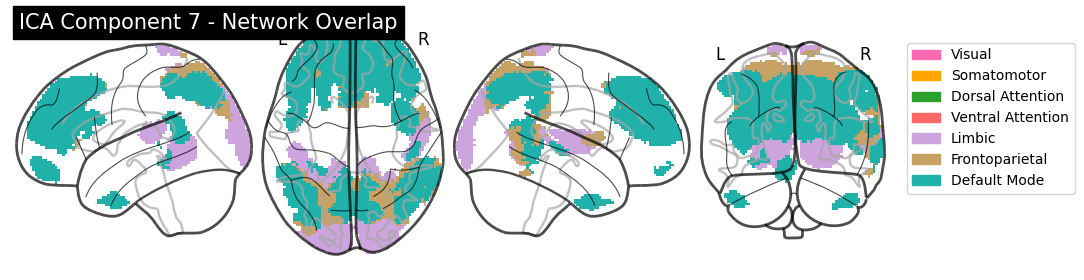

Saved: ./separate_ica_figures_Advanced_L1/ICA_Component_7_colored.png


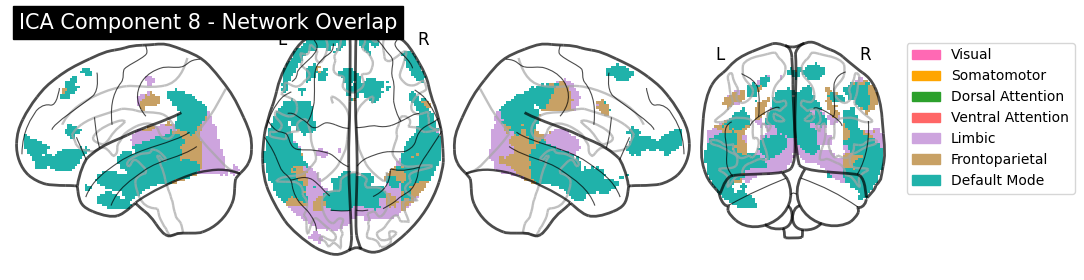

Saved: ./separate_ica_figures_Advanced_L1/ICA_Component_8_colored.png


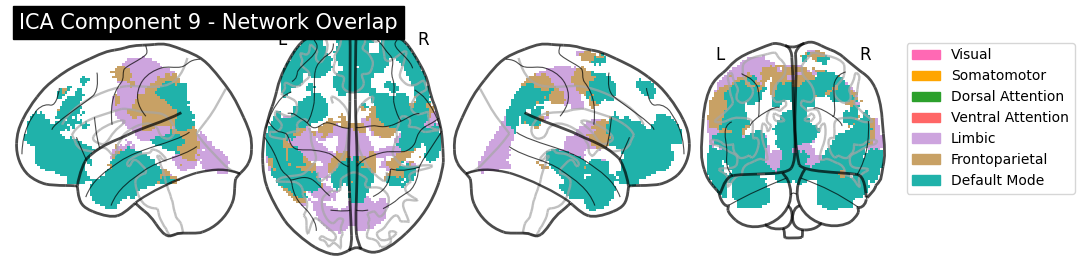

Saved: ./separate_ica_figures_Advanced_L1/ICA_Component_9_colored.png


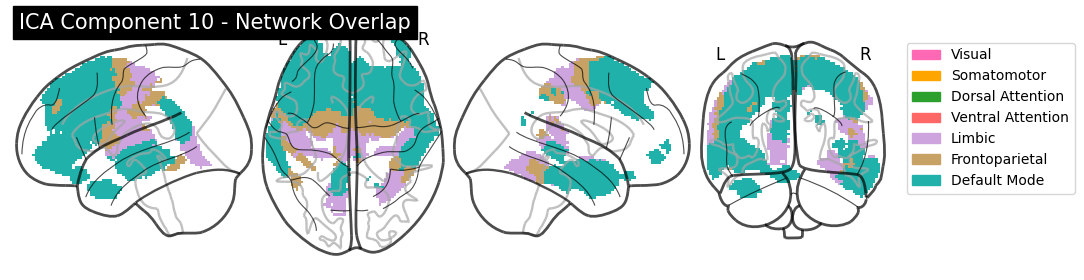

Saved: ./separate_ica_figures_Advanced_L1/ICA_Component_10_colored.png


In [38]:
import os
import glob
import numpy as np
import nibabel as nib
import pandas as pd
import matplotlib.pyplot as plt
from nilearn import image, plotting
from nilearn.image import resample_to_img
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# Paths
ica_dir = "/Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Basic_L1"
atlas_path = "/Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/networks/Schaefer2018_1000Parcels_7Networks_order_FSLMNI152_2mm.nii.gz"
labels_path = "/Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/networks/Schaefer2018_1000Parcels_7Networks_order.txt"

# Output directory for individual ICA figures
figdir = "./separate_ica_figures_Advanced_L1"
os.makedirs(figdir, exist_ok=True)

# Load ICA components
ica_files = sorted(glob.glob(os.path.join(ica_dir, "ICA_*.nii.gz")))
ica_imgs = [nib.load(f) for f in ica_files]

# Load atlas and labels
atlas_img = nib.load(atlas_path)
atlas_data = atlas_img.get_fdata()

# Load and parse network labels
with open(labels_path, 'r') as f:
    labels = f.read().splitlines()

network_names_all = [label.split('_')[2] for label in labels]
unique_networks = sorted(set(network_names_all), key=network_names_all.index)
network_id_map = {name: idx + 1 for idx, name in enumerate(unique_networks)}
parcel_network_ids = np.array([network_id_map[n] for n in network_names_all])

# Build atlas map where each voxel is labeled with its network ID
atlas_network_map = np.zeros_like(atlas_data)
for parcel_idx in range(1, 1001):
    atlas_network_map[atlas_data == parcel_idx] = parcel_network_ids[parcel_idx - 1]

# Precompute voxel count per network
network_voxel_counts = {}
for net_id in range(1, 8):
    network_voxel_counts[net_id] = np.sum(atlas_network_map == net_id)

# Results list
results = []

# Analyze each ICA component
for comp_idx, comp_img in enumerate(ica_imgs):
    resampled_img = resample_to_img(comp_img, atlas_img, interpolation='continuous')
    comp_data = resampled_img.get_fdata()
    threshold = np.percentile(np.abs(comp_data), 95)
    active_voxels = np.abs(comp_data) >= threshold

    for net_id in range(1, 8):
        network_voxels = atlas_network_map == net_id
        shared_voxels = np.sum(active_voxels & network_voxels)
        percent_overlap = (shared_voxels / network_voxel_counts[net_id]) * 100 if network_voxel_counts[net_id] > 0 else 0

        results.append({
            "Component": f"ICA_{comp_idx + 1}",
            "Network_ID": net_id,
            "Network_Name": [k for k, v in network_id_map.items() if v == net_id][0],
            "Overlap_Voxels": shared_voxels,
            "Percent_Overlap": percent_overlap
        })

# Save CSVs
df = pd.DataFrame(results)

# Save voxel counts
df_voxels = df.pivot(index="Component", columns="Network_Name", values="Overlap_Voxels").fillna(0)
df_voxels.to_csv("ica_network_overlap_Basic_L1_voxels.csv")

# Save percent overlaps
df_percent = df.pivot(index="Component", columns="Network_Name", values="Percent_Overlap").fillna(0)
df_percent.to_csv("ica_network_overlap_Basic_L1_percentage.csv")

# Define color map and labels
network_ids = [1, 2, 3, 4, 5, 6, 7]
network_names = ["Visual", "Somatomotor", "Dorsal Attention", "Ventral Attention",
                 "Limbic", "Frontoparietal", "Default Mode"]
network_colors = [
    "#ff69b4",  # hot pink
    "#ffa500",  # vibrant orange
    "#2ca02c",  # bright light green
    "#ff6666",  # brighter light red
    "#cda4de",  # pastel purple with more color
    "#c8a165",  # warm light brown / caramel
    "#20b2aa"  # deep sky blue
]
custom_cmap = ListedColormap(network_colors)

# Plotting each ICA component's overlap
for comp_idx, comp_img in enumerate(ica_imgs):
    resampled_img = resample_to_img(comp_img, atlas_img, interpolation='continuous')
    comp_data = resampled_img.get_fdata()
    threshold = np.percentile(np.abs(comp_data), 95)
    active_voxels = np.abs(comp_data) >= threshold

    # Labeled map: 0 = background, others = network ID
    labeled_map = np.zeros_like(comp_data)
    for net_id in network_ids:
        net_mask = (atlas_network_map == net_id)
        labeled_map[active_voxels & net_mask] = net_id

    labeled_img = nib.Nifti1Image(labeled_map, affine=atlas_img.affine)

    # Display & Save
    display = plotting.plot_glass_brain(
        labeled_img, cmap=custom_cmap, display_mode='lzry', colorbar=False,
        title=f"ICA Component {comp_idx + 1} - Network Overlap"
    )

    legend_patches = [mpatches.Patch(color=network_colors[i], label=network_names[i]) for i in range(len(network_ids))]
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    output_path = os.path.join(figdir, f"ICA_Component_{comp_idx + 1}_colored.png")
    plt.savefig(output_path, bbox_inches='tight', dpi=150)
    plt.show()
    print(f"Saved: {output_path}")

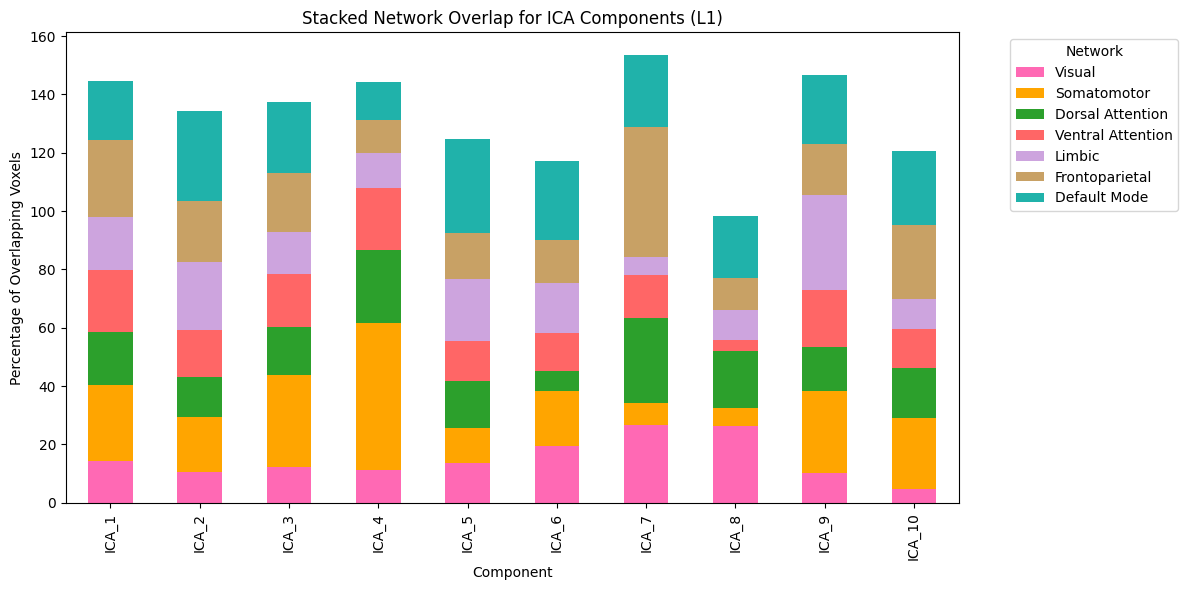

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Load your data
csv_path = "/Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ica_network_overlap_Basic_L1_percentage.csv"
df = pd.read_csv(csv_path)

# Set desired order for ICA components (ICA_1 to ICA_10)
df['Component'] = pd.Categorical(df['Component'],
    categories=sorted(df['Component'], key=lambda x: int(x.split('_')[1])),
    ordered=True)

# Define network order and labels
network_order_short = ['Vis', 'SomMot', 'DorsAttn', 'SalVentAttn', 'Limbic', 'Cont', 'Default']
network_order_full = ["Visual", "Somatomotor", "Dorsal Attention", "Ventral Attention",
                      "Limbic", "Frontoparietal", "Default Mode"]

# Define color map
network_colors = [
    "#ff69b4",  # Visual - hot pink
    "#ffa500",  # Somatomotor - orange
    "#2ca02c",  # Dorsal Attention - green
    "#ff6666",  # Ventral Attention - light red
    "#cda4de",  # Limbic - pastel purple
    "#c8a165",  # Frontoparietal - caramel
    "#20b2aa"   # Default Mode - deep sky blue
]
custom_cmap = ListedColormap(network_colors)

# Network label mapping
network_name_map = {
    'Vis': 'Visual',
    'SomMot': 'Somatomotor',
    'DorsAttn': 'Dorsal Attention',
    'SalVentAttn': 'Ventral Attention',
    'Limbic': 'Limbic',
    'Cont': 'Frontoparietal',
    'Default': 'Default Mode'
}

# --- Stacked Bar Plot ---
df_sorted = df.sort_values('Component')
df_plot = df_sorted.set_index('Component')[network_order_short]
df_plot.columns = [network_name_map[col] for col in df_plot.columns]

df_plot.plot(kind='bar', stacked=True, figsize=(12, 6), color=network_colors)
plt.ylabel("Percentage of Overlapping Voxels")
plt.title("Stacked Network Overlap for ICA Components (L1)")
plt.legend(title='Network', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

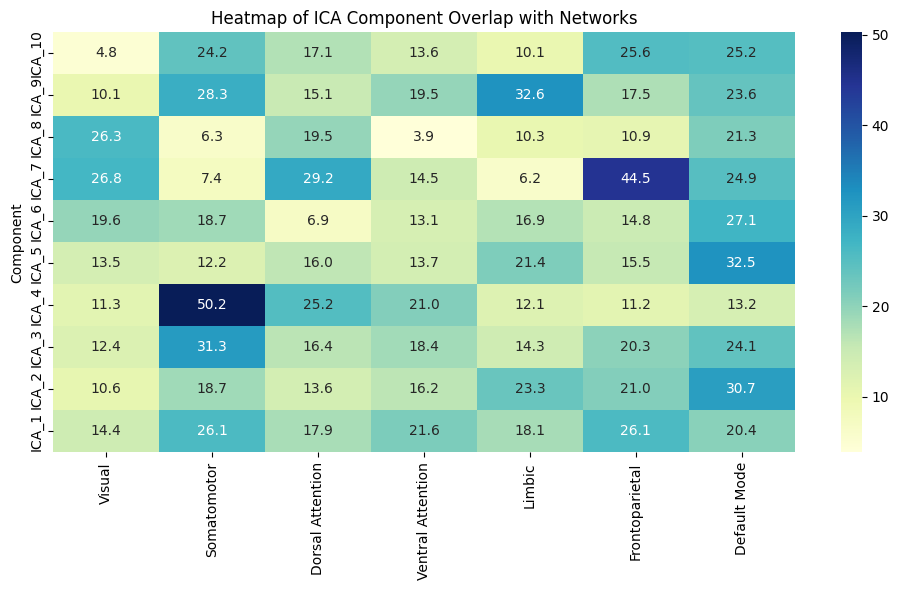

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
csv_path = "/Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ica_network_overlap_Basic_L1_percentage.csv"
df = pd.read_csv(csv_path)

# Set desired order for components (ICA_1 to ICA_10)
df['Component'] = pd.Categorical(df['Component'],
    categories=sorted(df['Component'], key=lambda x: int(x.split('_')[1])),
    ordered=True)

# Set the desired network order
network_order_short = ['Vis', 'SomMot', 'DorsAttn', 'SalVentAttn', 'Limbic', 'Cont', 'Default']
network_order_full = ['Visual', 'Somatomotor', 'Dorsal Attention', 'Ventral Attention', 'Limbic', 'Frontoparietal', 'Default Mode']

# Mapping short to full network names
network_name_map = {
    'Vis': 'Visual',
    'SomMot': 'Somatomotor',
    'DorsAttn': 'Dorsal Attention',
    'SalVentAttn': 'Ventral Attention',
    'Limbic': 'Limbic',
    'Cont': 'Frontoparietal',
    'Default': 'Default Mode'
}
# --- Heatmap ---
plt.figure(figsize=(10, 6))
heatmap_data = df.set_index('Component').loc[:, network_order_short]
heatmap_data.columns = [network_name_map[col] for col in heatmap_data.columns]

# Ensure correct order ICA_1 to ICA_10 top to bottom
heatmap_data = heatmap_data.loc[sorted(heatmap_data.index, key=lambda x: int(x.split('_')[1]))]
heatmap_data = heatmap_data.iloc[::-1]  # Flip vertically to put ICA_1 at top

sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title("Heatmap of ICA Component Overlap with Networks")
plt.tight_layout()
plt.show()

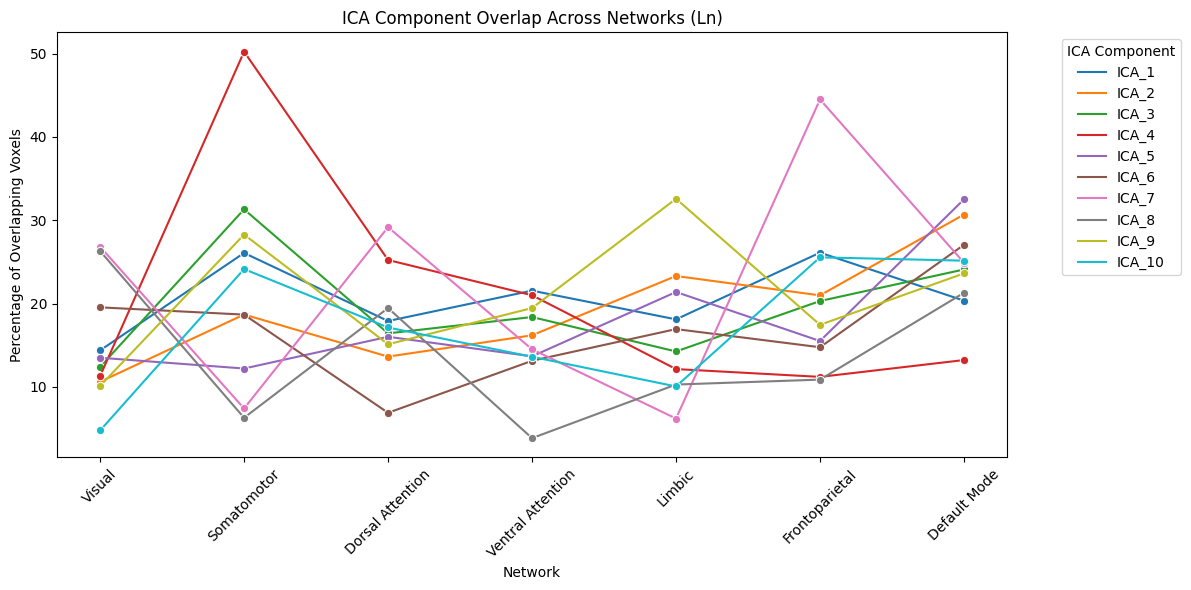

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
csv_path = "/Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ica_network_overlap_Basic_L1_percentage.csv"
df = pd.read_csv(csv_path)

# Set the desired network orders
network_order_short = ['Vis', 'SomMot', 'DorsAttn', 'SalVentAttn', 'Limbic', 'Cont', 'Default']
network_order_full = ['Visual', 'Somatomotor', 'Dorsal Attention', 'Ventral Attention', 'Limbic', 'Frontoparietal', 'Default Mode']

# Create mapping for full names
network_name_map = {
    'Vis': 'Visual',
    'SomMot': 'Somatomotor',
    'DorsAttn': 'Dorsal Attention',
    'SalVentAttn': 'Ventral Attention',
    'Limbic': 'Limbic',
    'Cont': 'Frontoparietal',
    'Default': 'Default Mode'
}

# Ensure ICA components are ordered (ICA_1 to ICA_10)
df['Component'] = pd.Categorical(df['Component'],
    categories=sorted(df['Component'], key=lambda x: int(x.split('_')[1])),
    ordered=True)

# Melt the dataframe into long format for seaborn
df_long = pd.melt(df, id_vars='Component', value_vars=network_order_short,
                  var_name='Network', value_name='Overlap')

# Map network short names to full names
df_long['Network'] = df_long['Network'].map(network_name_map)

# Set categorical order for networks
df_long['Network'] = pd.Categorical(df_long['Network'], categories=network_order_full, ordered=True)

# --- Line Plot ---
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long, x='Network', y='Overlap', hue='Component', marker='o')
plt.title("ICA Component Overlap Across Networks (Ln)")
plt.ylabel("Percentage of Overlapping Voxels")
plt.xticks(rotation=45)
plt.legend(title='ICA Component', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

Ln

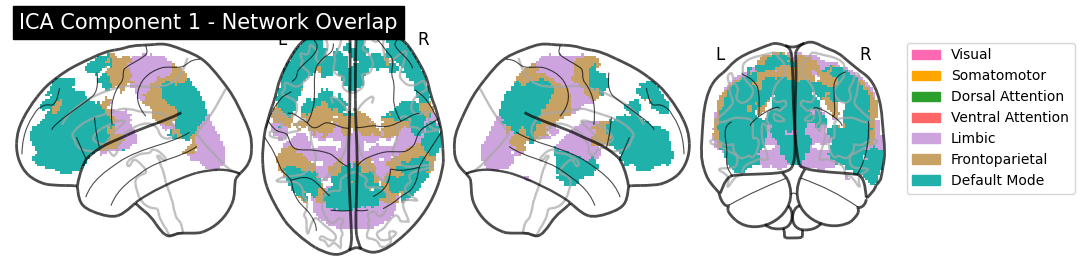

Saved: ./separate_ica_figures_Advanced_L1/ICA_Component_1_colored.png


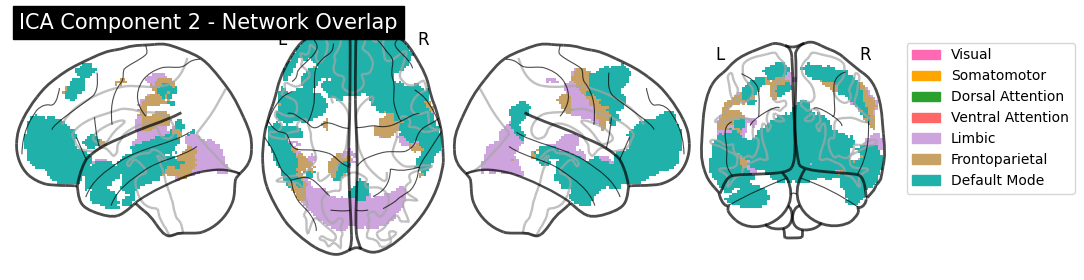

Saved: ./separate_ica_figures_Advanced_L1/ICA_Component_2_colored.png


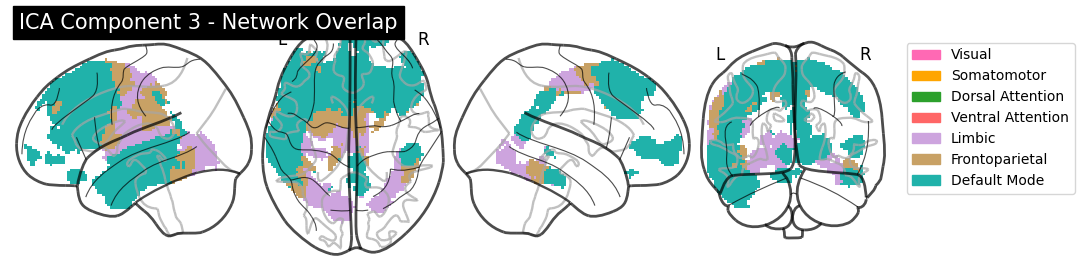

Saved: ./separate_ica_figures_Advanced_L1/ICA_Component_3_colored.png


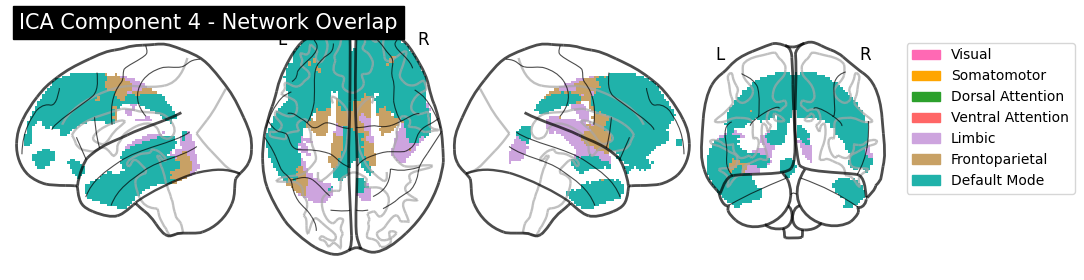

Saved: ./separate_ica_figures_Advanced_L1/ICA_Component_4_colored.png


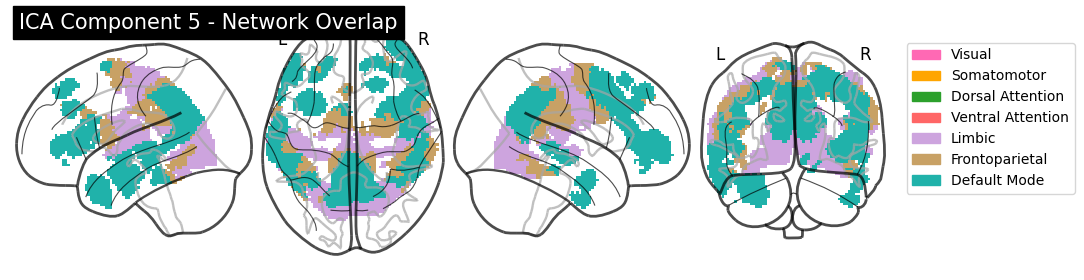

Saved: ./separate_ica_figures_Advanced_L1/ICA_Component_5_colored.png


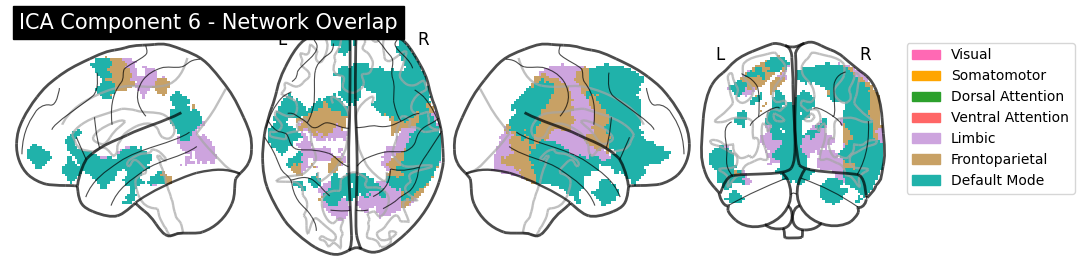

Saved: ./separate_ica_figures_Advanced_L1/ICA_Component_6_colored.png


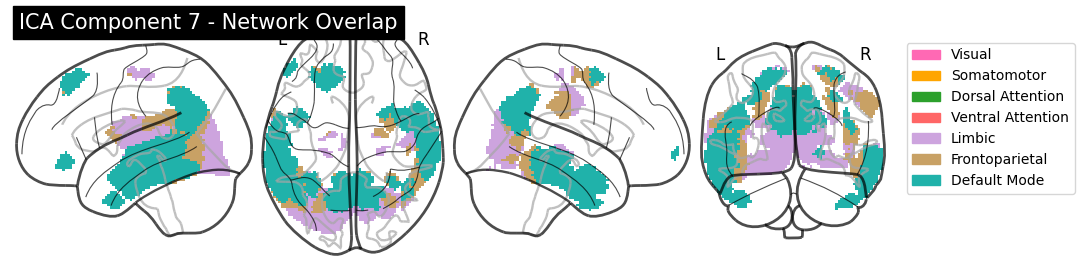

Saved: ./separate_ica_figures_Advanced_L1/ICA_Component_7_colored.png


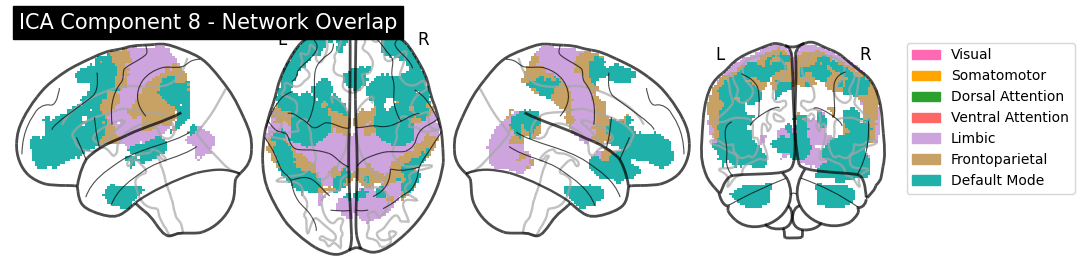

Saved: ./separate_ica_figures_Advanced_L1/ICA_Component_8_colored.png


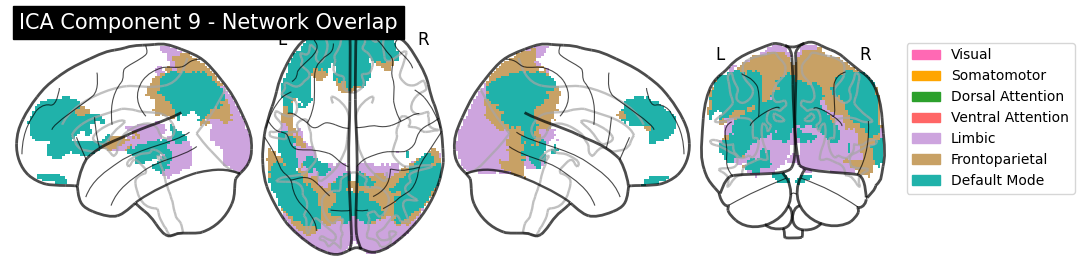

Saved: ./separate_ica_figures_Advanced_L1/ICA_Component_9_colored.png


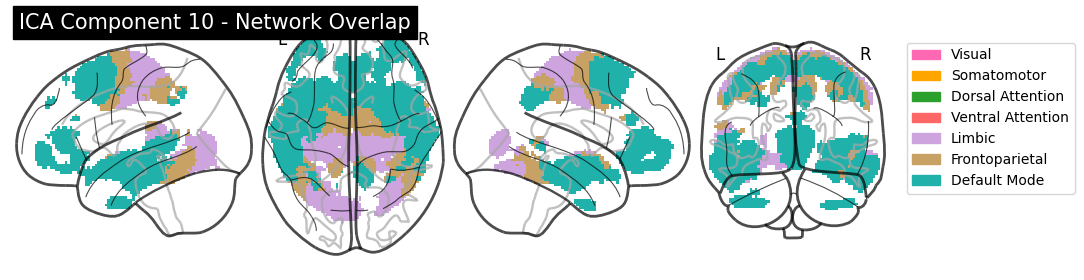

Saved: ./separate_ica_figures_Advanced_L1/ICA_Component_10_colored.png


In [42]:
import os
import glob
import numpy as np
import nibabel as nib
import pandas as pd
import matplotlib.pyplot as plt
from nilearn import image, plotting
from nilearn.image import resample_to_img
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# Paths
ica_dir = "/Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ICA_Basic_Ln"
atlas_path = "/Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/networks/Schaefer2018_1000Parcels_7Networks_order_FSLMNI152_2mm.nii.gz"
labels_path = "/Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/networks/Schaefer2018_1000Parcels_7Networks_order.txt"

# Output directory for individual ICA figures
figdir = "./separate_ica_figures_Advanced_L1"
os.makedirs(figdir, exist_ok=True)

# Load ICA components
ica_files = sorted(glob.glob(os.path.join(ica_dir, "ICA_*.nii.gz")))
ica_imgs = [nib.load(f) for f in ica_files]

# Load atlas and labels
atlas_img = nib.load(atlas_path)
atlas_data = atlas_img.get_fdata()

# Load and parse network labels
with open(labels_path, 'r') as f:
    labels = f.read().splitlines()

network_names_all = [label.split('_')[2] for label in labels]
unique_networks = sorted(set(network_names_all), key=network_names_all.index)
network_id_map = {name: idx + 1 for idx, name in enumerate(unique_networks)}
parcel_network_ids = np.array([network_id_map[n] for n in network_names_all])

# Build atlas map where each voxel is labeled with its network ID
atlas_network_map = np.zeros_like(atlas_data)
for parcel_idx in range(1, 1001):
    atlas_network_map[atlas_data == parcel_idx] = parcel_network_ids[parcel_idx - 1]

# Precompute voxel count per network
network_voxel_counts = {}
for net_id in range(1, 8):
    network_voxel_counts[net_id] = np.sum(atlas_network_map == net_id)

# Results list
results = []

# Analyze each ICA component
for comp_idx, comp_img in enumerate(ica_imgs):
    resampled_img = resample_to_img(comp_img, atlas_img, interpolation='continuous')
    comp_data = resampled_img.get_fdata()
    threshold = np.percentile(np.abs(comp_data), 95)
    active_voxels = np.abs(comp_data) >= threshold

    for net_id in range(1, 8):
        network_voxels = atlas_network_map == net_id
        shared_voxels = np.sum(active_voxels & network_voxels)
        percent_overlap = (shared_voxels / network_voxel_counts[net_id]) * 100 if network_voxel_counts[net_id] > 0 else 0

        results.append({
            "Component": f"ICA_{comp_idx + 1}",
            "Network_ID": net_id,
            "Network_Name": [k for k, v in network_id_map.items() if v == net_id][0],
            "Overlap_Voxels": shared_voxels,
            "Percent_Overlap": percent_overlap
        })

# Save CSVs
df = pd.DataFrame(results)

# Save voxel counts
df_voxels = df.pivot(index="Component", columns="Network_Name", values="Overlap_Voxels").fillna(0)
df_voxels.to_csv("ica_network_overlap_Basic_Ln_voxels.csv")

# Save percent overlaps
df_percent = df.pivot(index="Component", columns="Network_Name", values="Percent_Overlap").fillna(0)
df_percent.to_csv("ica_network_overlap_Basic_Ln_percentage.csv")

# Define color map and labels
network_ids = [1, 2, 3, 4, 5, 6, 7]
network_names = ["Visual", "Somatomotor", "Dorsal Attention", "Ventral Attention",
                 "Limbic", "Frontoparietal", "Default Mode"]
network_colors = [
    "#ff69b4",  # hot pink
    "#ffa500",  # vibrant orange
    "#2ca02c",  # bright light green
    "#ff6666",  # brighter light red
    "#cda4de",  # pastel purple with more color
    "#c8a165",  # warm light brown / caramel
    "#20b2aa"  # deep sky blue
]
custom_cmap = ListedColormap(network_colors)

# Plotting each ICA component's overlap
for comp_idx, comp_img in enumerate(ica_imgs):
    resampled_img = resample_to_img(comp_img, atlas_img, interpolation='continuous')
    comp_data = resampled_img.get_fdata()
    threshold = np.percentile(np.abs(comp_data), 95)
    active_voxels = np.abs(comp_data) >= threshold

    # Labeled map: 0 = background, others = network ID
    labeled_map = np.zeros_like(comp_data)
    for net_id in network_ids:
        net_mask = (atlas_network_map == net_id)
        labeled_map[active_voxels & net_mask] = net_id

    labeled_img = nib.Nifti1Image(labeled_map, affine=atlas_img.affine)

    # Display & Save
    display = plotting.plot_glass_brain(
        labeled_img, cmap=custom_cmap, display_mode='lzry', colorbar=False,
        title=f"ICA Component {comp_idx + 1} - Network Overlap"
    )

    legend_patches = [mpatches.Patch(color=network_colors[i], label=network_names[i]) for i in range(len(network_ids))]
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    output_path = os.path.join(figdir, f"ICA_Component_{comp_idx + 1}_colored.png")
    plt.savefig(output_path, bbox_inches='tight', dpi=150)
    plt.show()
    print(f"Saved: {output_path}")

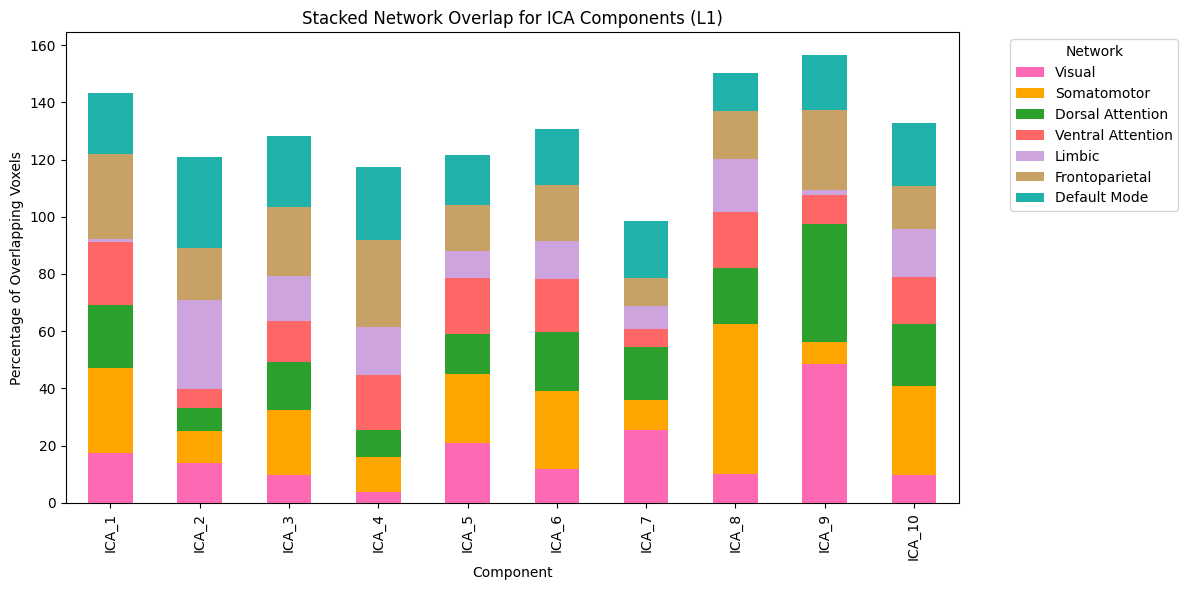

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Load your data
csv_path = "/Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ica_network_overlap_Basic_Ln_percentage.csv"
df = pd.read_csv(csv_path)

# Set desired order for ICA components (ICA_1 to ICA_10)
df['Component'] = pd.Categorical(df['Component'],
    categories=sorted(df['Component'], key=lambda x: int(x.split('_')[1])),
    ordered=True)

# Define network order and labels
network_order_short = ['Vis', 'SomMot', 'DorsAttn', 'SalVentAttn', 'Limbic', 'Cont', 'Default']
network_order_full = ["Visual", "Somatomotor", "Dorsal Attention", "Ventral Attention",
                      "Limbic", "Frontoparietal", "Default Mode"]

# Define color map
network_colors = [
    "#ff69b4",  # Visual - hot pink
    "#ffa500",  # Somatomotor - orange
    "#2ca02c",  # Dorsal Attention - green
    "#ff6666",  # Ventral Attention - light red
    "#cda4de",  # Limbic - pastel purple
    "#c8a165",  # Frontoparietal - caramel
    "#20b2aa"   # Default Mode - deep sky blue
]
custom_cmap = ListedColormap(network_colors)

# Network label mapping
network_name_map = {
    'Vis': 'Visual',
    'SomMot': 'Somatomotor',
    'DorsAttn': 'Dorsal Attention',
    'SalVentAttn': 'Ventral Attention',
    'Limbic': 'Limbic',
    'Cont': 'Frontoparietal',
    'Default': 'Default Mode'
}

# --- Stacked Bar Plot ---
df_sorted = df.sort_values('Component')
df_plot = df_sorted.set_index('Component')[network_order_short]
df_plot.columns = [network_name_map[col] for col in df_plot.columns]

df_plot.plot(kind='bar', stacked=True, figsize=(12, 6), color=network_colors)
plt.ylabel("Percentage of Overlapping Voxels")
plt.title("Stacked Network Overlap for ICA Components (L1)")
plt.legend(title='Network', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

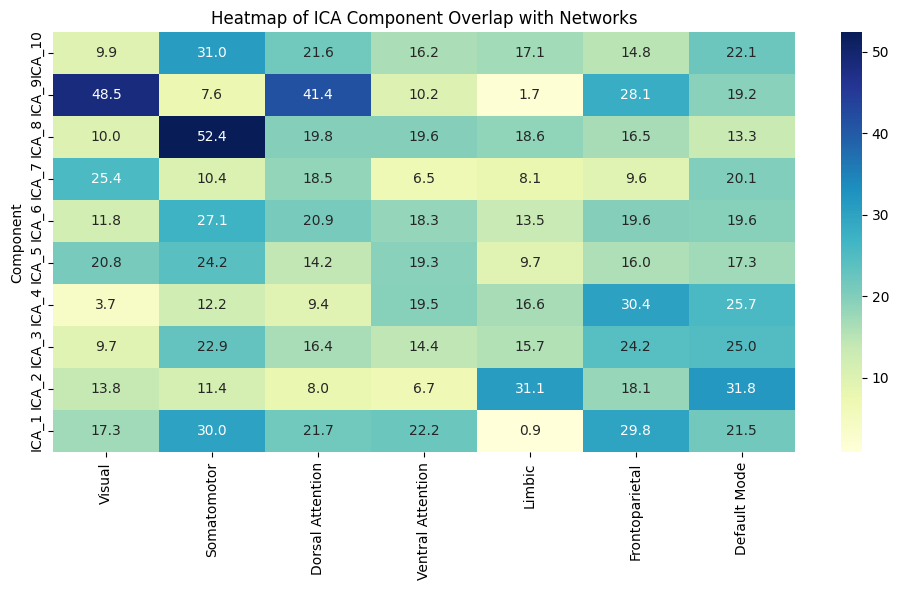

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
csv_path = "/Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ica_network_overlap_Basic_Ln_percentage.csv"
df = pd.read_csv(csv_path)

# Set desired order for components (ICA_1 to ICA_10)
df['Component'] = pd.Categorical(df['Component'],
    categories=sorted(df['Component'], key=lambda x: int(x.split('_')[1])),
    ordered=True)

# Set the desired network order
network_order_short = ['Vis', 'SomMot', 'DorsAttn', 'SalVentAttn', 'Limbic', 'Cont', 'Default']
network_order_full = ['Visual', 'Somatomotor', 'Dorsal Attention', 'Ventral Attention', 'Limbic', 'Frontoparietal', 'Default Mode']

# Mapping short to full network names
network_name_map = {
    'Vis': 'Visual',
    'SomMot': 'Somatomotor',
    'DorsAttn': 'Dorsal Attention',
    'SalVentAttn': 'Ventral Attention',
    'Limbic': 'Limbic',
    'Cont': 'Frontoparietal',
    'Default': 'Default Mode'
}
# --- Heatmap ---
plt.figure(figsize=(10, 6))
heatmap_data = df.set_index('Component').loc[:, network_order_short]
heatmap_data.columns = [network_name_map[col] for col in heatmap_data.columns]

# Ensure correct order ICA_1 to ICA_10 top to bottom
heatmap_data = heatmap_data.loc[sorted(heatmap_data.index, key=lambda x: int(x.split('_')[1]))]
heatmap_data = heatmap_data.iloc[::-1]  # Flip vertically to put ICA_1 at top

sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title("Heatmap of ICA Component Overlap with Networks")
plt.tight_layout()
plt.show()

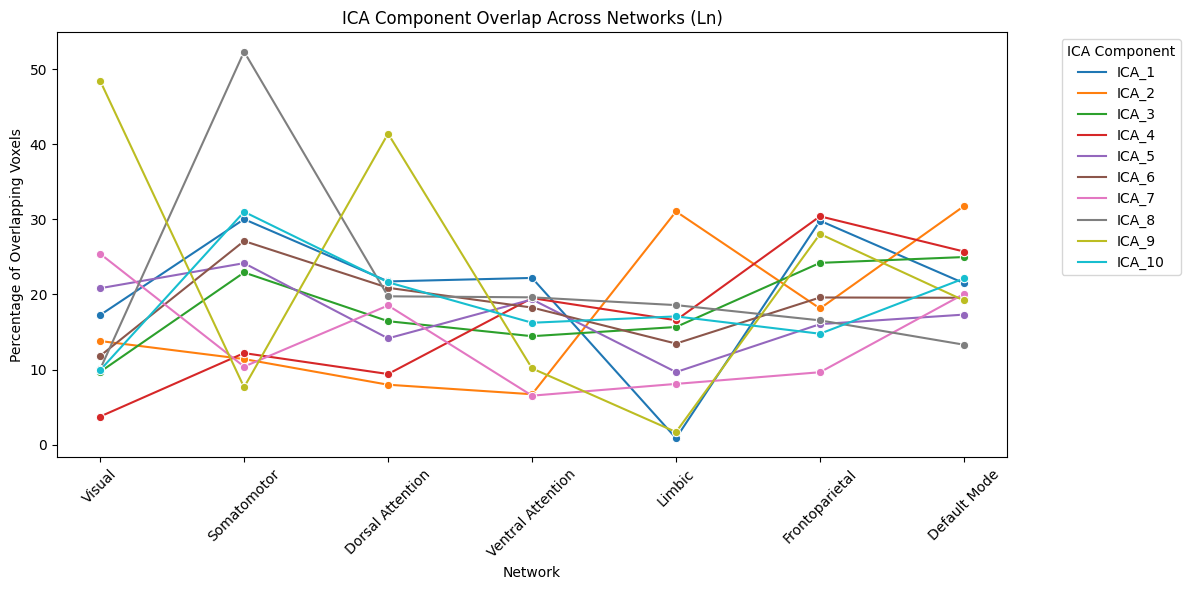

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
csv_path = "/Users/onilarasanjala/Desktop/Third Semester/Cog Neu Science/Code files and data/ica_network_overlap_Basic_Ln_percentage.csv"
df = pd.read_csv(csv_path)

# Set the desired network orders
network_order_short = ['Vis', 'SomMot', 'DorsAttn', 'SalVentAttn', 'Limbic', 'Cont', 'Default']
network_order_full = ['Visual', 'Somatomotor', 'Dorsal Attention', 'Ventral Attention', 'Limbic', 'Frontoparietal', 'Default Mode']

# Create mapping for full names
network_name_map = {
    'Vis': 'Visual',
    'SomMot': 'Somatomotor',
    'DorsAttn': 'Dorsal Attention',
    'SalVentAttn': 'Ventral Attention',
    'Limbic': 'Limbic',
    'Cont': 'Frontoparietal',
    'Default': 'Default Mode'
}

# Ensure ICA components are ordered (ICA_1 to ICA_10)
df['Component'] = pd.Categorical(df['Component'],
    categories=sorted(df['Component'], key=lambda x: int(x.split('_')[1])),
    ordered=True)

# Melt the dataframe into long format for seaborn
df_long = pd.melt(df, id_vars='Component', value_vars=network_order_short,
                  var_name='Network', value_name='Overlap')

# Map network short names to full names
df_long['Network'] = df_long['Network'].map(network_name_map)

# Set categorical order for networks
df_long['Network'] = pd.Categorical(df_long['Network'], categories=network_order_full, ordered=True)

# --- Line Plot ---
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long, x='Network', y='Overlap', hue='Component', marker='o')
plt.title("ICA Component Overlap Across Networks (Ln)")
plt.ylabel("Percentage of Overlapping Voxels")
plt.xticks(rotation=45)
plt.legend(title='ICA Component', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

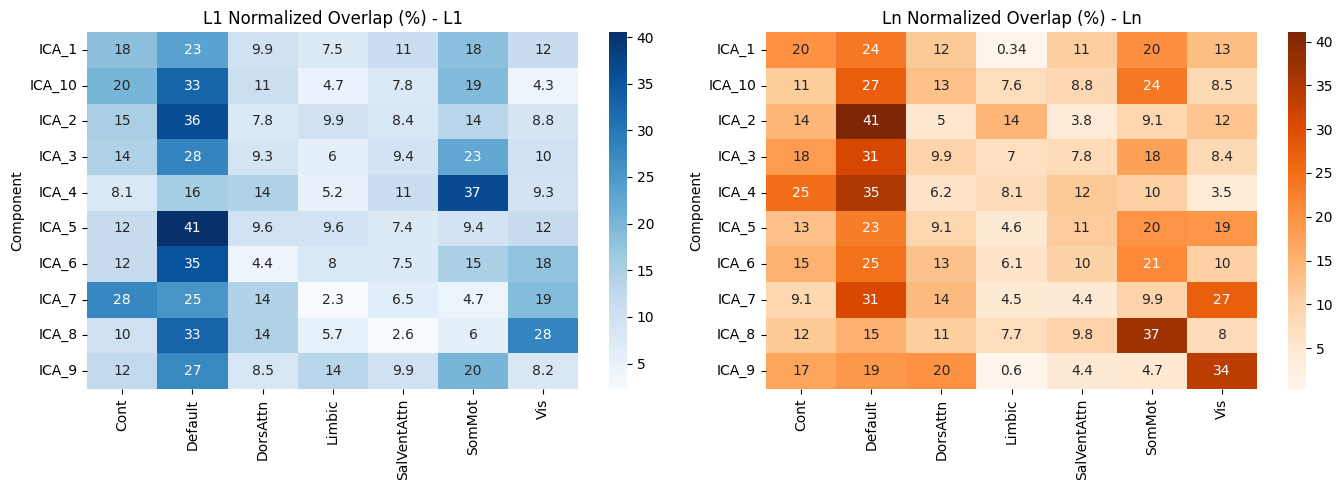

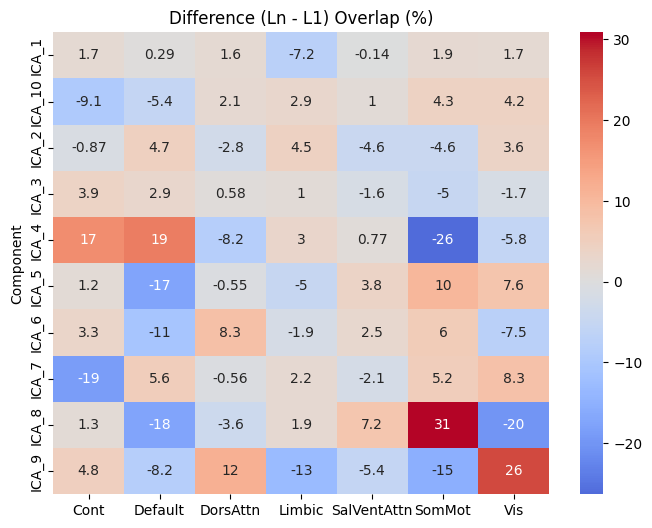


Paired t-test results (Ln vs L1) per network:
Cont: t = 0.16, p = 0.8752
Default: t = -0.73, p = 0.4845
DorsAttn: t = 0.47, p = 0.6463
Limbic: t = -0.65, p = 0.5325
SalVentAttn: t = 0.13, p = 0.9013
SomMot: t = 0.15, p = 0.8836
Vis: t = 0.42, p = 0.6850


In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel, wilcoxon

# Load the data
l1_df = pd.read_csv("ica_network_overlap_Basic_L1_voxels.csv", index_col=0)
ln_df = pd.read_csv("ica_network_overlap_Basic_Ln_voxels.csv", index_col=0)

# Normalize to percentage per component
l1_norm = l1_df.div(l1_df.sum(axis=1), axis=0) * 100
ln_norm = ln_df.div(ln_df.sum(axis=1), axis=0) * 100

# Quick heatmap of normalized overlap
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.heatmap(l1_norm, annot=True, cmap='Blues')
plt.title('L1 Normalized Overlap (%) - L1')

plt.subplot(1, 2, 2)
sns.heatmap(ln_norm, annot=True, cmap='Oranges')
plt.title('Ln Normalized Overlap (%) - Ln')
plt.tight_layout()
plt.show()

# Difference heatmap
diff = ln_norm - l1_norm
plt.figure(figsize=(8, 6))
sns.heatmap(diff, annot=True, center=0, cmap='coolwarm')
plt.title('Difference (Ln - L1) Overlap (%)')
plt.show()

# Paired t-tests or Wilcoxon test per network
print("\nPaired t-test results (Ln vs L1) per network:")
for network in l1_norm.columns:
    t_stat, p_val = ttest_rel(ln_norm[network], l1_norm[network])
    print(f"{network}: t = {t_stat:.2f}, p = {p_val:.4f}")